# `01` Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 

# `02` Load and Split Data

## Load Data

In [2]:
data = pd.read_csv("train.csv")
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


### Understand Data

!["understand_dataset"](understand_dataset.png)

## Split Data

In [3]:
train, valid = train_test_split(data, train_size=0.85, random_state=89, stratify=data['NObeyesdad'])

print(train.shape) # 85% of the dataset
print(valid.shape) # 15% of the dataset




(17644, 18)
(3114, 18)


## Check The Percentage Of Each Class In Each Sample

### Origin Data

In [4]:
data['NObeyesdad'].value_counts()


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [5]:
for value in data['NObeyesdad'].value_counts().index:
    count = data['NObeyesdad'].value_counts()[value]
    print(value, "=", count, "==>", round((count/len(data))*100, 2), "%")

Obesity_Type_III = 4046 ==> 19.49 %
Obesity_Type_II = 3248 ==> 15.65 %
Normal_Weight = 3082 ==> 14.85 %
Obesity_Type_I = 2910 ==> 14.02 %
Insufficient_Weight = 2523 ==> 12.15 %
Overweight_Level_II = 2522 ==> 12.15 %
Overweight_Level_I = 2427 ==> 11.69 %


### Train Data

In [6]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       3439
Obesity_Type_II        2761
Normal_Weight          2620
Obesity_Type_I         2473
Overweight_Level_II    2144
Insufficient_Weight    2144
Overweight_Level_I     2063
Name: count, dtype: int64

In [7]:
for value in train['NObeyesdad'].value_counts().index:
    count = train['NObeyesdad'].value_counts()[value]
    print(value, "=", count, "==>", round((count/len(train))*100, 2), "%")

Obesity_Type_III = 3439 ==> 19.49 %
Obesity_Type_II = 2761 ==> 15.65 %
Normal_Weight = 2620 ==> 14.85 %
Obesity_Type_I = 2473 ==> 14.02 %
Overweight_Level_II = 2144 ==> 12.15 %
Insufficient_Weight = 2144 ==> 12.15 %
Overweight_Level_I = 2063 ==> 11.69 %


### Valid Data

In [8]:
valid['NObeyesdad'].value_counts()


NObeyesdad
Obesity_Type_III       607
Obesity_Type_II        487
Normal_Weight          462
Obesity_Type_I         437
Insufficient_Weight    379
Overweight_Level_II    378
Overweight_Level_I     364
Name: count, dtype: int64

In [9]:
for value in valid['NObeyesdad'].value_counts().index:
    count = valid['NObeyesdad'].value_counts()[value]
    print(value, "=", count, "==>", round((count/len(valid))*100, 2), "%")

Obesity_Type_III = 607 ==> 19.49 %
Obesity_Type_II = 487 ==> 15.64 %
Normal_Weight = 462 ==> 14.84 %
Obesity_Type_I = 437 ==> 14.03 %
Insufficient_Weight = 379 ==> 12.17 %
Overweight_Level_II = 378 ==> 12.14 %
Overweight_Level_I = 364 ==> 11.69 %


# `03` Exploratory Data Analysis - EDA

## `i` Simple Analysis

### Reset the index train data

In [10]:
# Reset The index
train = train.reset_index()
train.drop(columns=['index'], inplace=True)

### Rename The Columns For Simplicity 

In [11]:
train_renamed = train.copy()
train_renamed.rename(columns={'FAVC':"high_cal_consumption", 'FCVC':"vegetable_consumption", "NCP":"meals_number", 
                              'CAEC':"eating_between_meals", "CH2O":"water_consumption", "SCC":"calorie_monitoring", 
                              "FAF":"physical_activity", "TUE":"screen_time", "CALC":"alcohole_consumption",
                              "MTRANS":"transportation_mode", "NObeyesdad":"obesity_level"
                              }, inplace=True)

In [12]:
train_renamed

,id,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_consumption,vegetable_consumption,meals_number,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,15070,Male,22.025438,1.701387,105.436173,yes,yes,2.000000,1.874532,Sometimes,no,2.224914,no,1.228136,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
1,7379,Male,21.000000,1.620000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,501,Male,34.000000,1.740000,73.000000,no,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Normal_Weight
3,12503,Female,34.288249,1.721348,80.420434,yes,yes,2.000000,2.983201,Sometimes,no,3.000000,no,0.836554,0.004813,no,Automobile,Overweight_Level_II
4,7986,Male,30.717727,1.673482,112.395309,yes,yes,2.765063,3.000000,Sometimes,no,2.148146,no,0.000000,1.670313,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,4431,Female,22.226815,1.609068,83.263120,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.451078,0.000000,no,Public_Transportation,Obesity_Type_I
17640,5361,Female,18.530840,1.823765,142.545183,yes,yes,3.000000,3.000000,Sometimes,no,2.474518,no,1.700889,1.339691,Sometimes,Public_Transportation,Obesity_Type_III
17641,16962,Male,29.000000,1.760000,76.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
17642,19796,Female,26.000000,1.623938,107.025415,yes,yes,3.000000,3.000000,Sometimes,no,2.476002,no,0.000000,0.655558,Sometimes,Public_Transportation,Obesity_Type_III


### Get General Information About Data [Numeric & Categorical]

In [13]:
train_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17644 entries, 0 to 17643
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17644 non-null  int64  
 1   Gender                          17644 non-null  object 
 2   Age                             17644 non-null  float64
 3   Height                          17644 non-null  float64
 4   Weight                          17644 non-null  float64
 5   family_history_with_overweight  17644 non-null  object 
 6   high_cal_consumption            17644 non-null  object 
 7   vegetable_consumption           17644 non-null  float64
 8   meals_number                    17644 non-null  float64
 9   eating_between_meals            17644 non-null  object 
 10  SMOKE                           17644 non-null  object 
 11  water_consumption               17644 non-null  float64
 12  calorie_monitoring              

### Check For Missing Values

In [14]:
train_renamed.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_cal_consumption              0
vegetable_consumption             0
meals_number                      0
eating_between_meals              0
SMOKE                             0
water_consumption                 0
calorie_monitoring                0
physical_activity                 0
screen_time                       0
alcohole_consumption              0
transportation_mode               0
obesity_level                     0
dtype: int64

### Check Only Numerical Columns

In [15]:
train_renamed.describe().iloc[:,1:]

,Age,Height,Weight,vegetable_consumption,meals_number,water_consumption,physical_activity,screen_time
count,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000
mean,23.845885,1.700121,87.890919,2.445944,2.761619,2.030133,0.975436,0.618791
std,5.691321,0.087163,26.319145,0.533030,0.704965,0.608170,0.838028,0.603528
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.796376,0.001297,0.000000
50%,22.832105,1.700000,84.127657,2.392665,3.000000,2.000000,1.000000,0.573958
75%,26.000000,1.762152,111.600553,3.000000,3.000000,2.549617,1.582675,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
train_numerical = train_renamed.select_dtypes(exclude="object")
train_numerical

,id,Age,Height,Weight,vegetable_consumption,meals_number,water_consumption,physical_activity,screen_time
0,15070,22.025438,1.701387,105.436173,2.000000,1.874532,2.224914,1.228136,0.000000
1,7379,21.000000,1.620000,70.000000,2.000000,3.000000,1.000000,1.000000,0.000000
2,501,34.000000,1.740000,73.000000,2.000000,3.000000,2.000000,2.000000,1.000000
3,12503,34.288249,1.721348,80.420434,2.000000,2.983201,3.000000,0.836554,0.004813
4,7986,30.717727,1.673482,112.395309,2.765063,3.000000,2.148146,0.000000,1.670313
...,...,...,...,...,...,...,...,...,...
17639,4431,22.226815,1.609068,83.263120,2.000000,1.000000,2.000000,0.451078,0.000000
17640,5361,18.530840,1.823765,142.545183,3.000000,3.000000,2.474518,1.700889,1.339691
17641,16962,29.000000,1.760000,76.000000,2.000000,3.000000,2.000000,1.000000,0.000000
17642,19796,26.000000,1.623938,107.025415,3.000000,3.000000,2.476002,0.000000,0.655558


### Check Each Numeric Column Alone

In [17]:
for numeric_col in train_numerical.columns[1:]:
    print(f"=========================== {numeric_col} =============================")
    print(train_numerical[numeric_col])
    print()


=========================== Age =============================
0        22.025438
1        21.000000
2        34.000000
3        34.288249
4        30.717727
           ...    
17639    22.226815
17640    18.530840
17641    29.000000
17642    26.000000
17643    26.000000
Name: Age, Length: 17644, dtype: float64

=========================== Height =============================
0        1.701387
1        1.620000
2        1.740000
3        1.721348
4        1.673482
           ...   
17639    1.609068
17640    1.823765
17641    1.760000
17642    1.623938
17643    1.641132
Name: Height, Length: 17644, dtype: float64

=========================== Weight =============================
0        105.436173
1         70.000000
2         73.000000
3         80.420434
4        112.395309
            ...    
17639     83.263120
17640    142.545183
17641     76.000000
17642    107.025415
17643    111.939983
Name: Weight, Length: 17644, dtype: float64

=========================== vegetable_consumption

### Separate Scaling Columns Alone
- Scaling Columns : Columns that have a specific range of values [0 -> 2 for instance] 

In [18]:
train_numeric_scaling = train_numerical[['vegetable_consumption', 'meals_number', 'water_consumption', 'physical_activity', 'screen_time']]
train_numeric_scaling

,vegetable_consumption,meals_number,water_consumption,physical_activity,screen_time
0,2.000000,1.874532,2.224914,1.228136,0.000000
1,2.000000,3.000000,1.000000,1.000000,0.000000
2,2.000000,3.000000,2.000000,2.000000,1.000000
3,2.000000,2.983201,3.000000,0.836554,0.004813
4,2.765063,3.000000,2.148146,0.000000,1.670313
...,...,...,...,...,...
17639,2.000000,1.000000,2.000000,0.451078,0.000000
17640,3.000000,3.000000,2.474518,1.700889,1.339691
17641,2.000000,3.000000,2.000000,1.000000,0.000000
17642,3.000000,3.000000,2.476002,0.000000,0.655558


### Check Unique Values For The Scaling Columns

In [19]:
for col in train_numeric_scaling.columns:
    print(f"=========================== {col} =============================")
    print(train_numeric_scaling[col].unique())
    print(len(train_numeric_scaling[col].unique()))
    print()

=========================== vegetable_consumption =============================
[2.         2.765063   3.         2.13683    1.882235   2.57691
 2.977585   2.319776   2.671238   2.819934   2.630137   1.
 2.9673     2.178889   2.225731   2.591439   2.935157   2.66889
 2.540949   2.191429   2.081238   2.869833   2.983042   1.064162
 1.601236   2.9553     2.680375   2.507841   1.99124    2.14128
 2.252698   2.724285   1.142468   1.289421   2.918113   1.887951
 2.475892   2.938801   1.31415    1.961347   2.802128   2.962415
 2.954996   1.369529   2.801514   2.043359   1.979944   2.38695
 2.357496   1.562804   1.826885   1.031149   1.362441   2.014194
 2.754646   2.784464   2.637202   1.813234   1.123939   2.33998
 2.631565   1.947405   2.348745   2.674431   1.758394   2.95801
 2.880792   2.766612   2.432355   2.636719   2.919584   2.869436
 2.145114   2.70825    2.908757   1.624366   2.821727   1.918251
 1.164062   1.003566   2.591292   2.074843   2.303041   2.499108
 2.938616   1.567101  

### Check Only Categorical Columns

In [20]:
train_categorical = train_renamed.select_dtypes(include="object")
train_categorical

,Gender,family_history_with_overweight,high_cal_consumption,eating_between_meals,SMOKE,calorie_monitoring,alcohole_consumption,transportation_mode,obesity_level
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
1,Male,no,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight
2,Male,no,no,Sometimes,no,no,Sometimes,Automobile,Normal_Weight
3,Female,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II
4,Male,yes,yes,Sometimes,no,no,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...
17639,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_I
17640,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
17641,Male,yes,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_I
17642,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


### Check Number Of Samples For Each Unique Value

In [21]:
for col in train_categorical:
    print(f"===================== {col} ======================")
    print(train_categorical[col].value_counts())
    print()

===================== Gender ======================
Gender
Female    8826
Male      8818
Name: count, dtype: int64

===================== family_history_with_overweight ======================
family_history_with_overweight
yes    14459
no      3185
Name: count, dtype: int64

===================== high_cal_consumption ======================
high_cal_consumption
yes    16135
no      1509
Name: count, dtype: int64

===================== eating_between_meals ======================
eating_between_meals
Sometimes     14887
Frequently     2103
Always          426
no              228
Name: count, dtype: int64

===================== SMOKE ======================
SMOKE
no     17431
yes      213
Name: count, dtype: int64

===================== calorie_monitoring ======================
calorie_monitoring
no     17059
yes      585
Name: count, dtype: int64

===================== alcohole_consumption ======================
alcohole_consumption
Sometimes     12788
no             4390
Frequently      4

## `ii` Visualization

## Setup Data For Better Visualization

In [22]:
train_renamed

,id,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_consumption,vegetable_consumption,meals_number,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,15070,Male,22.025438,1.701387,105.436173,yes,yes,2.000000,1.874532,Sometimes,no,2.224914,no,1.228136,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
1,7379,Male,21.000000,1.620000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,501,Male,34.000000,1.740000,73.000000,no,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Normal_Weight
3,12503,Female,34.288249,1.721348,80.420434,yes,yes,2.000000,2.983201,Sometimes,no,3.000000,no,0.836554,0.004813,no,Automobile,Overweight_Level_II
4,7986,Male,30.717727,1.673482,112.395309,yes,yes,2.765063,3.000000,Sometimes,no,2.148146,no,0.000000,1.670313,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,4431,Female,22.226815,1.609068,83.263120,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.451078,0.000000,no,Public_Transportation,Obesity_Type_I
17640,5361,Female,18.530840,1.823765,142.545183,yes,yes,3.000000,3.000000,Sometimes,no,2.474518,no,1.700889,1.339691,Sometimes,Public_Transportation,Obesity_Type_III
17641,16962,Male,29.000000,1.760000,76.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
17642,19796,Female,26.000000,1.623938,107.025415,yes,yes,3.000000,3.000000,Sometimes,no,2.476002,no,0.000000,0.655558,Sometimes,Public_Transportation,Obesity_Type_III


### Preprocess Train Data 

In [23]:
# drop id column
train_visualization = train_renamed.drop(columns=['id'])

In [24]:
# funciton that make equal-width-binning on the scaling columns
def equal_width_binning(data:pd.DataFrame, col_name:str, bins:int, labels:list, object:int):
    data = data.copy()
    print(pd.cut(data[col_name], bins=bins).cat.categories)
    
    # convert the column from categorical to object datatype
    if object == 1:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('object')
        return data[col_name]
    
    # convert the column from categorical to integer datatype
    elif object == 0:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('int32')
        return data[col_name]    

In [25]:
# Apply Function on [vegetable_consumption, screen_time]
target_columns = ['vegetable_consumption', 'screen_time', 'water_consumption']
for col in target_columns:
    train_visualization[col] = equal_width_binning(train_visualization, col, 3, ['low', 'medium', 'high'], object=1)
    print(train_visualization[col])
    print("\n================================================================\n")

# Apply Function on physical_activity
train_visualization['physical_activity'] = equal_width_binning(train_visualization, 'physical_activity', 4, ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], object=1)
print(train_visualization['physical_activity'])
print("================================================================\n")

# Apply Function on meals_number
train_visualization['meals_number'] = equal_width_binning(train_visualization, 'meals_number', 4, [1, 2, 3, 4], object=0)
print(train_visualization['meals_number'])
print("\n================================================================")


IntervalIndex([(0.998, 1.667], (1.667, 2.333], (2.333, 3.0]], dtype='interval[float64, right]')
0        medium
1        medium
2        medium
3        medium
4          high
          ...  
17639    medium
17640      high
17641    medium
17642      high
17643      high
Name: vegetable_consumption, Length: 17644, dtype: object


IntervalIndex([(-0.002, 0.667], (0.667, 1.333], (1.333, 2.0]], dtype='interval[float64, right]')
0           low
1           low
2        medium
3           low
4          high
          ...  
17639       low
17640      high
17641       low
17642       low
17643       low
Name: screen_time, Length: 17644, dtype: object


IntervalIndex([(0.998, 1.667], (1.667, 2.333], (2.333, 3.0]], dtype='interval[float64, right]')
0        medium
1           low
2        medium
3          high
4        medium
          ...  
17639    medium
17640      high
17641    medium
17642      high
17643       low
Name: water_consumption, Length: 17644, dtype: object




IntervalIndex([(-0.003, 0.75], (0.75, 1.5], (1.5, 2.25], (2.25, 3.0]], dtype='interval[float64, right]')
0           Light Activity
1           Light Activity
2        Moderate Activity
3           Light Activity
4                Sedentary
               ...        
17639            Sedentary
17640    Moderate Activity
17641       Light Activity
17642            Sedentary
17643            Sedentary
Name: physical_activity, Length: 17644, dtype: object

IntervalIndex([(0.997, 1.75], (1.75, 2.5], (2.5, 3.25], (3.25, 4.0]], dtype='interval[float64, right]')
0        2
1        3
2        3
3        3
4        3
        ..
17639    1
17640    3
17641    3
17642    3
17643    3
Name: meals_number, Length: 17644, dtype: int32



In [26]:
train_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17644 entries, 0 to 17643
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          17644 non-null  object 
 1   Age                             17644 non-null  float64
 2   Height                          17644 non-null  float64
 3   Weight                          17644 non-null  float64
 4   family_history_with_overweight  17644 non-null  object 
 5   high_cal_consumption            17644 non-null  object 
 6   vegetable_consumption           17644 non-null  object 
 7   meals_number                    17644 non-null  int32  
 8   eating_between_meals            17644 non-null  object 
 9   SMOKE                           17644 non-null  object 
 10  water_consumption               17644 non-null  object 
 11  calorie_monitoring              17644 non-null  object 
 12  physical_activity               

### Univariate - Numerical Columns

In [27]:
train_numeric_visualization = train_visualization.select_dtypes(exclude="object")
train_numeric_visualization

,Age,Height,Weight,meals_number
0,22.025438,1.701387,105.436173,2
1,21.000000,1.620000,70.000000,3
2,34.000000,1.740000,73.000000,3
3,34.288249,1.721348,80.420434,3
4,30.717727,1.673482,112.395309,3
...,...,...,...,...
17639,22.226815,1.609068,83.263120,1
17640,18.530840,1.823765,142.545183,3
17641,29.000000,1.760000,76.000000,3
17642,26.000000,1.623938,107.025415,3


### Histogram - Box Plot - Violon plot

================== Age ===================


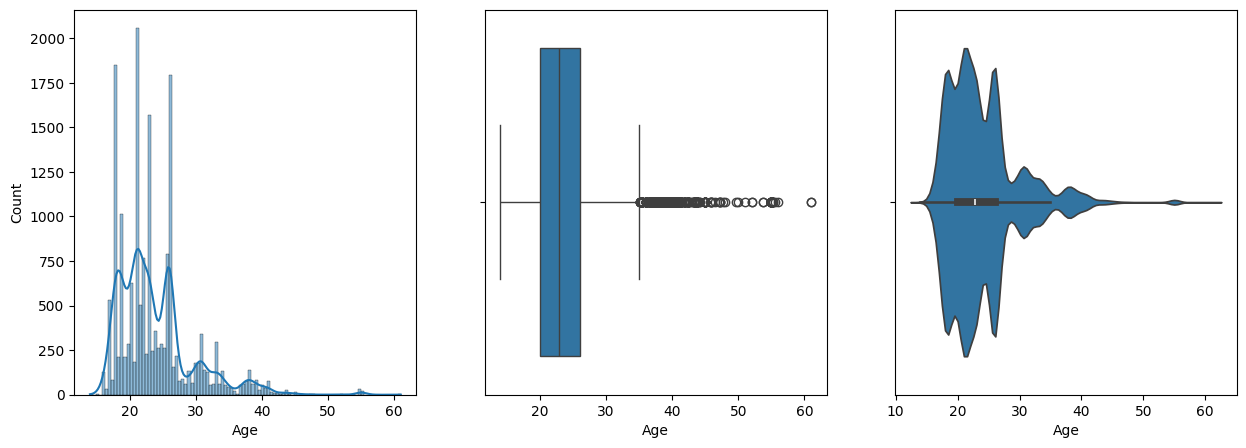

================== Height ===================


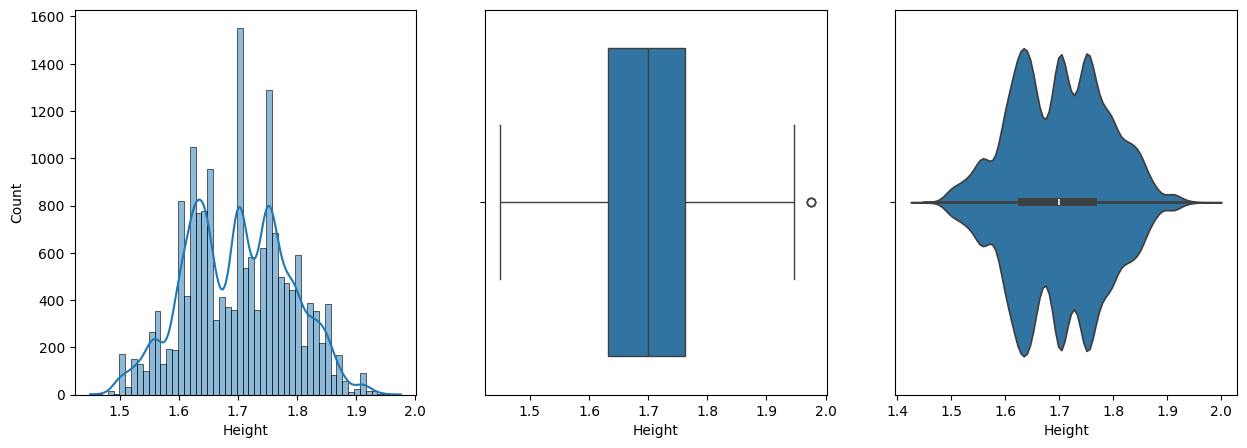

================== Weight ===================


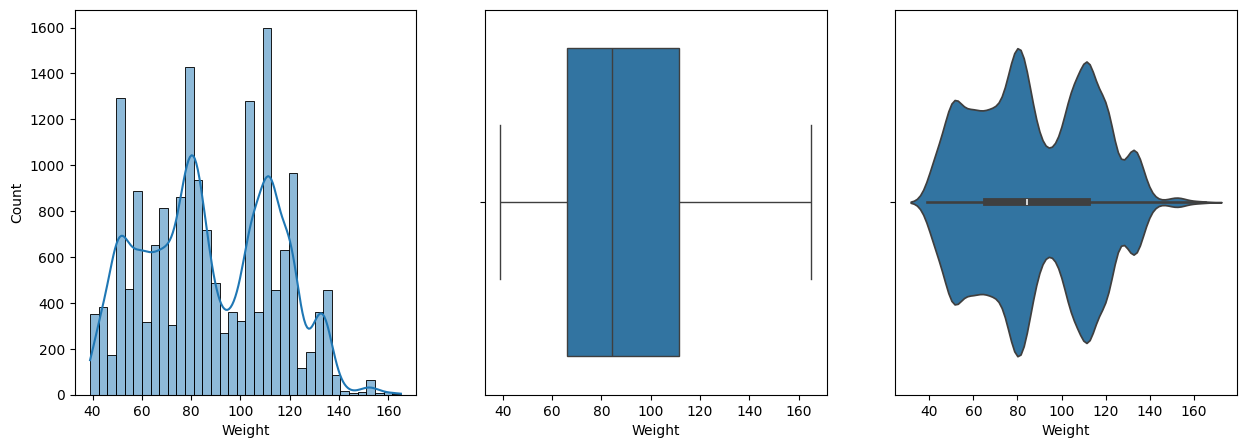

================== meals_number ===================


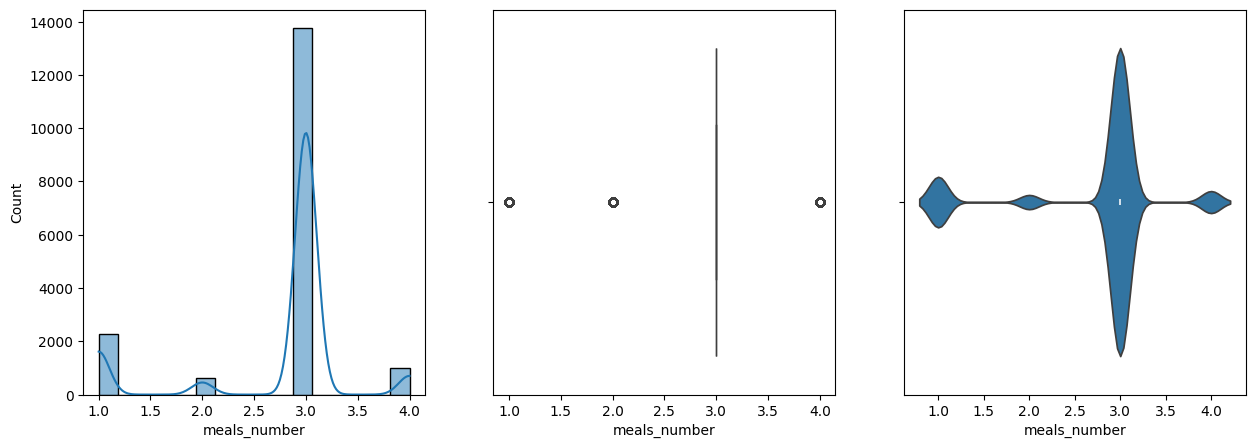

In [28]:
for col in train_numeric_visualization:
    print(f"================== {col} ===================")
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    sns.histplot(data=train_numeric_visualization[col], kde=True)

    plt.subplot(1,3,2)
    sns.boxplot(data=train_numeric_visualization[col],orient='h')

    plt.subplot(1,3,3)
    sns.violinplot(data=train_numeric_visualization[col],orient='h')
    
    plt.show()

### Univariate - Categorical Columns

In [29]:
train_categorical_visualization = train_visualization.select_dtypes(include="object")
train_categorical_visualization

,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,Male,yes,yes,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Obesity_Type_I
1,Male,no,yes,medium,Sometimes,no,low,no,Light Activity,low,Sometimes,Public_Transportation,Normal_Weight
2,Male,no,no,medium,Sometimes,no,medium,no,Moderate Activity,medium,Sometimes,Automobile,Normal_Weight
3,Female,yes,yes,medium,Sometimes,no,high,no,Light Activity,low,no,Automobile,Overweight_Level_II
4,Male,yes,yes,high,Sometimes,no,medium,no,Sedentary,high,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,Female,yes,yes,medium,Sometimes,no,medium,no,Sedentary,low,no,Public_Transportation,Obesity_Type_I
17640,Female,yes,yes,high,Sometimes,no,high,no,Moderate Activity,high,Sometimes,Public_Transportation,Obesity_Type_III
17641,Male,yes,no,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Overweight_Level_I
17642,Female,yes,yes,high,Sometimes,no,high,no,Sedentary,low,Sometimes,Public_Transportation,Obesity_Type_III


================== Gender ===================


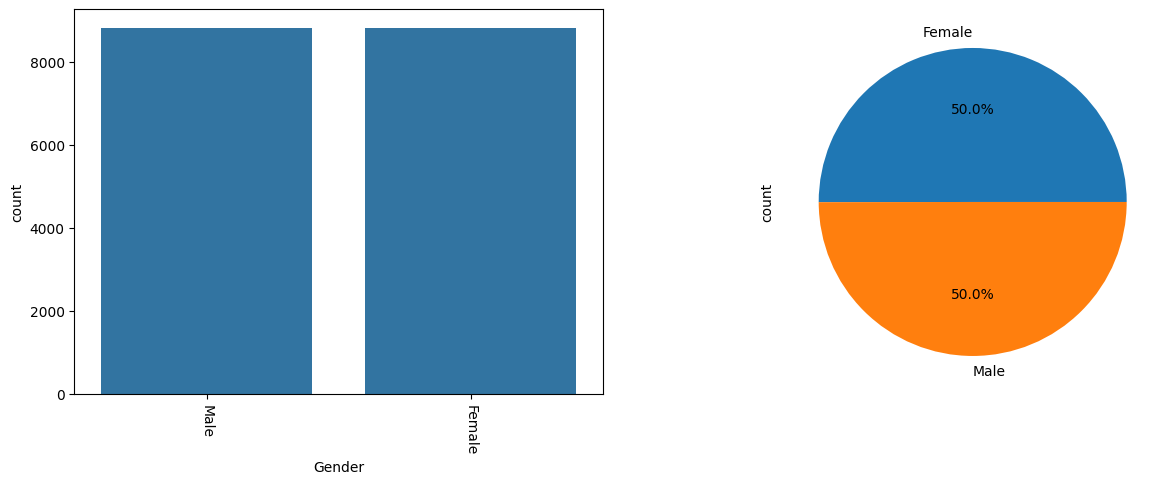

================== family_history_with_overweight ===================


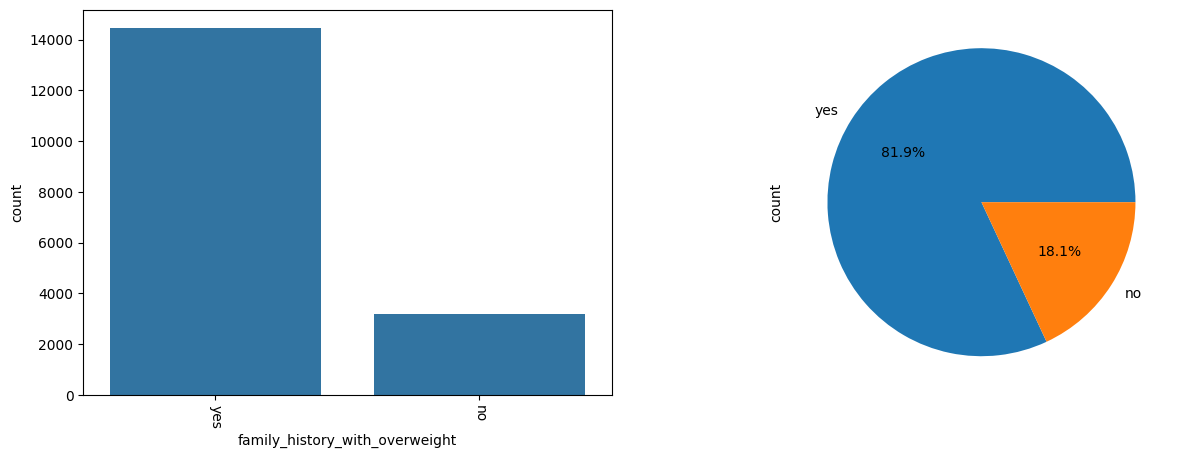

================== high_cal_consumption ===================


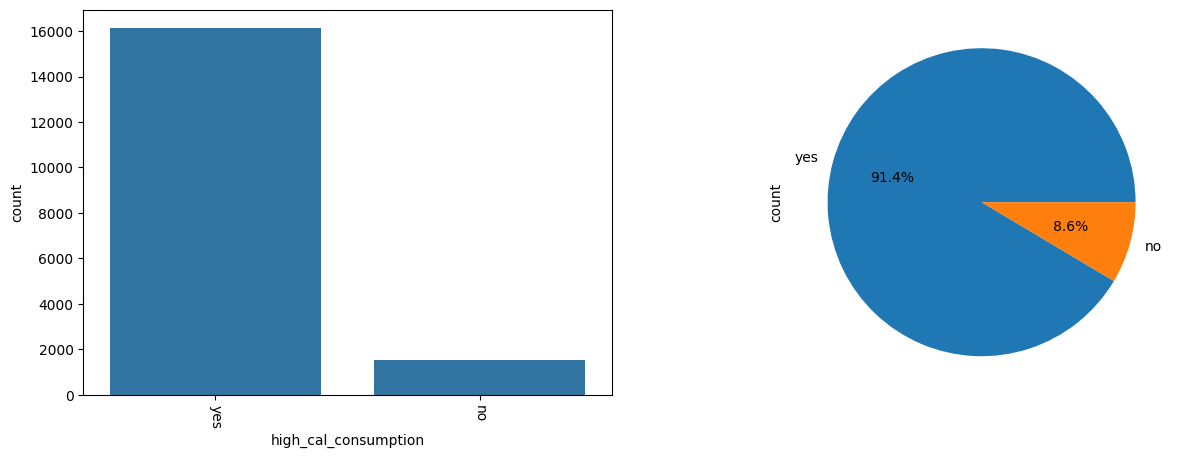

================== vegetable_consumption ===================


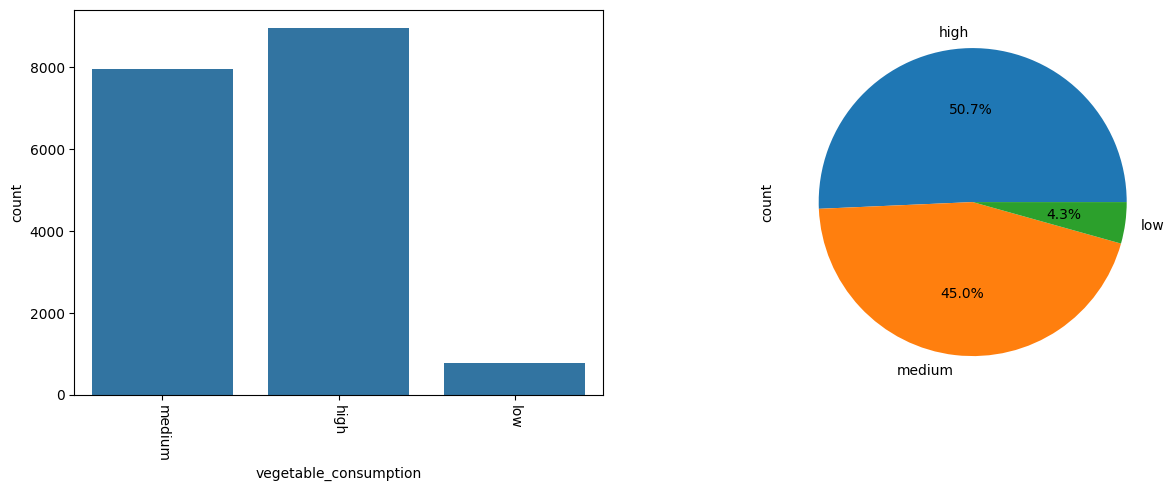

================== eating_between_meals ===================


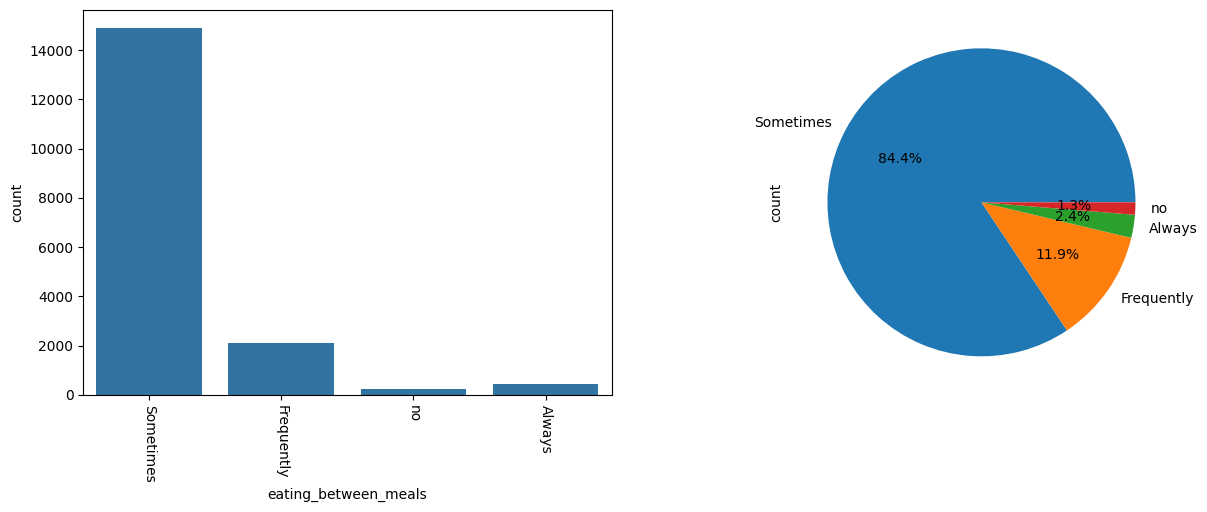

================== SMOKE ===================


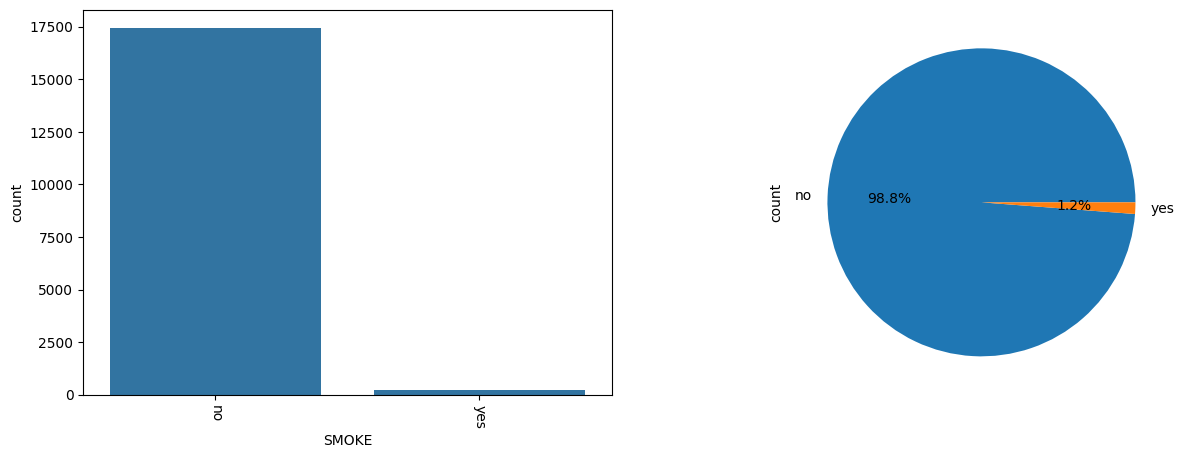

================== water_consumption ===================


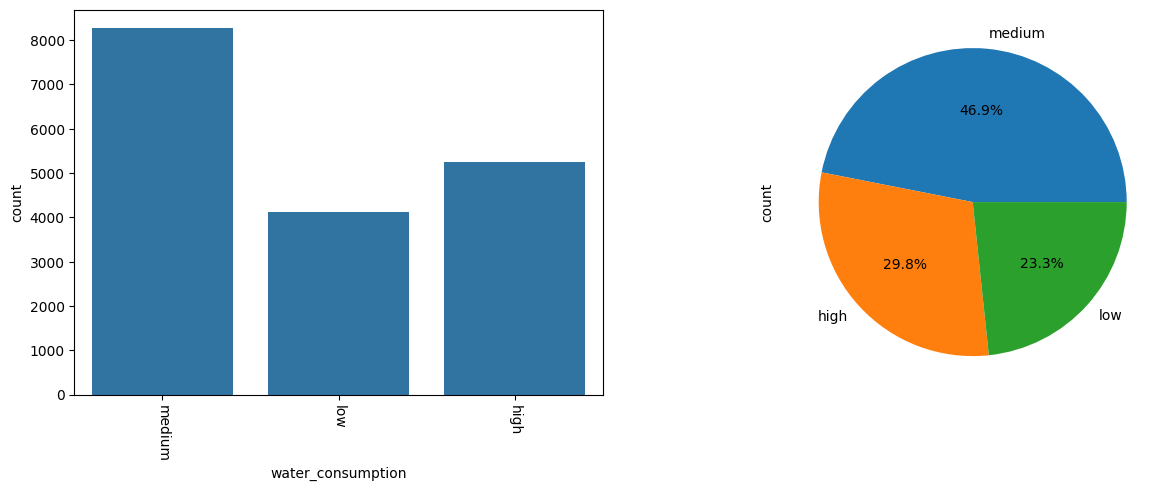

================== calorie_monitoring ===================


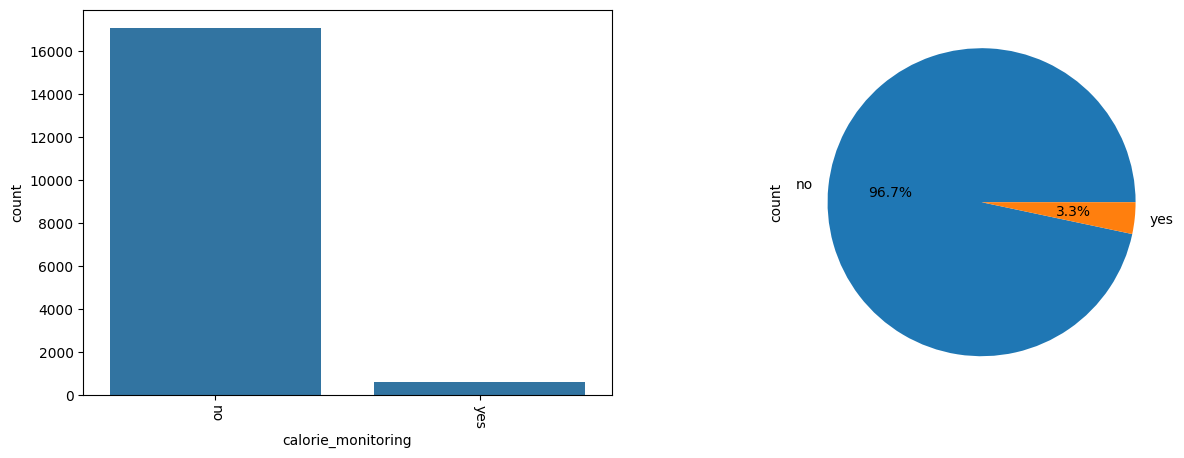

================== physical_activity ===================


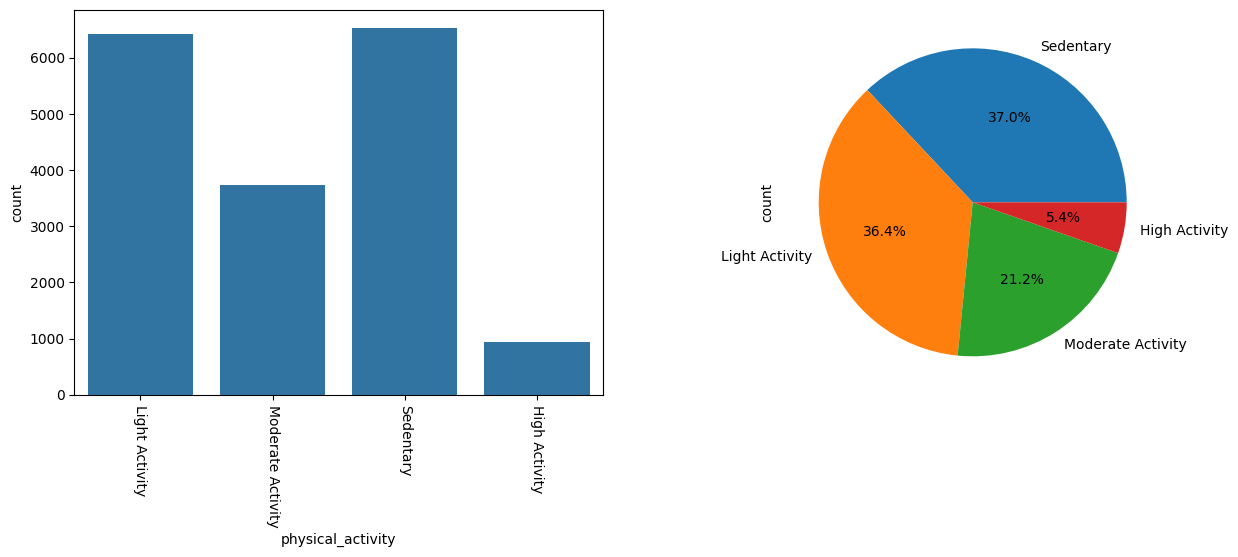

================== screen_time ===================


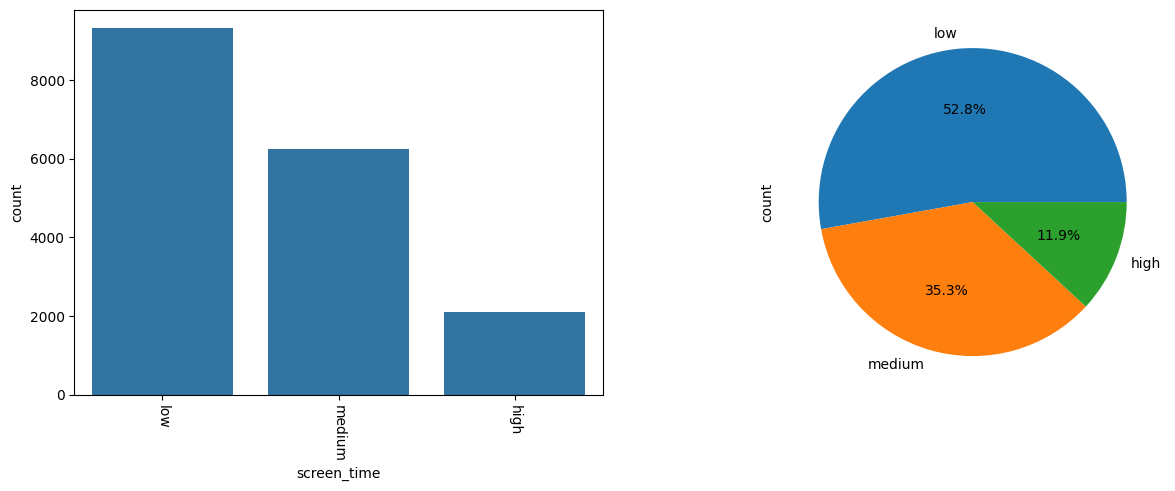

================== alcohole_consumption ===================


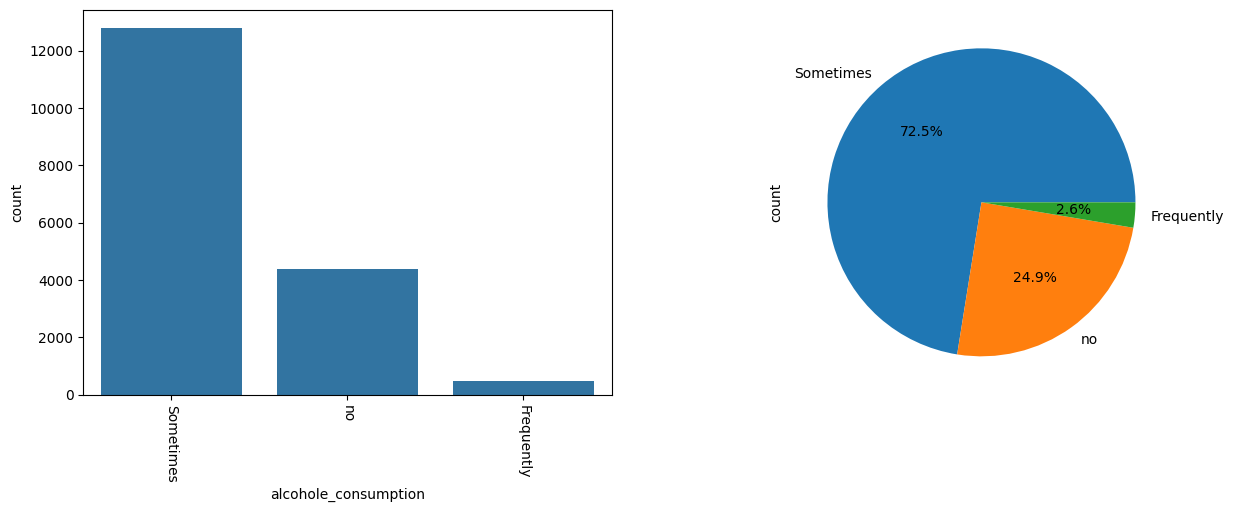

================== transportation_mode ===================


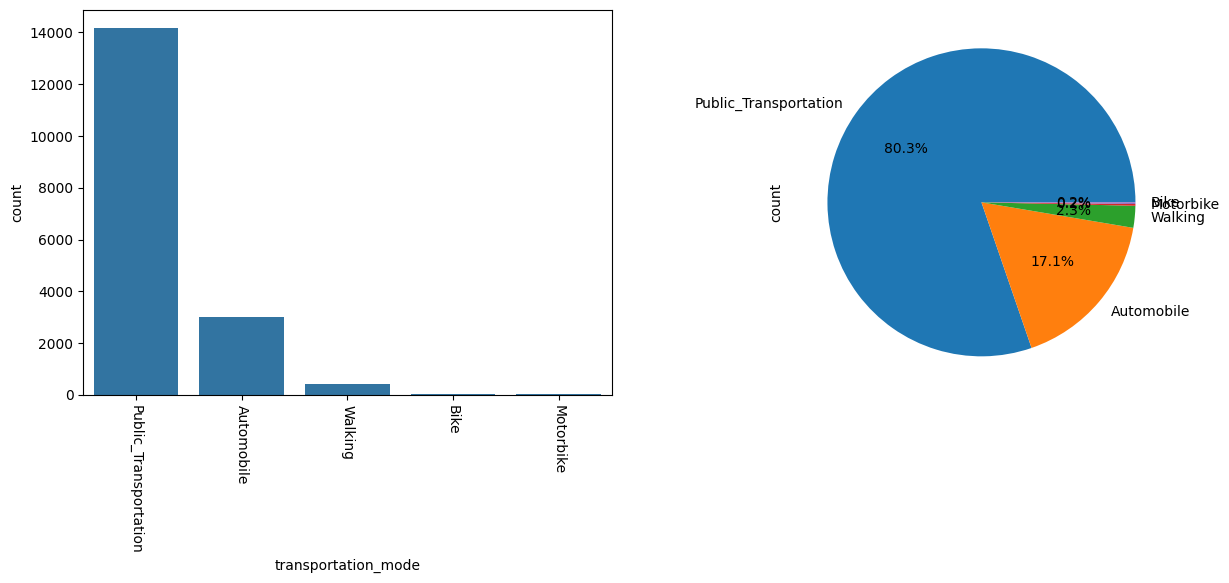

================== obesity_level ===================


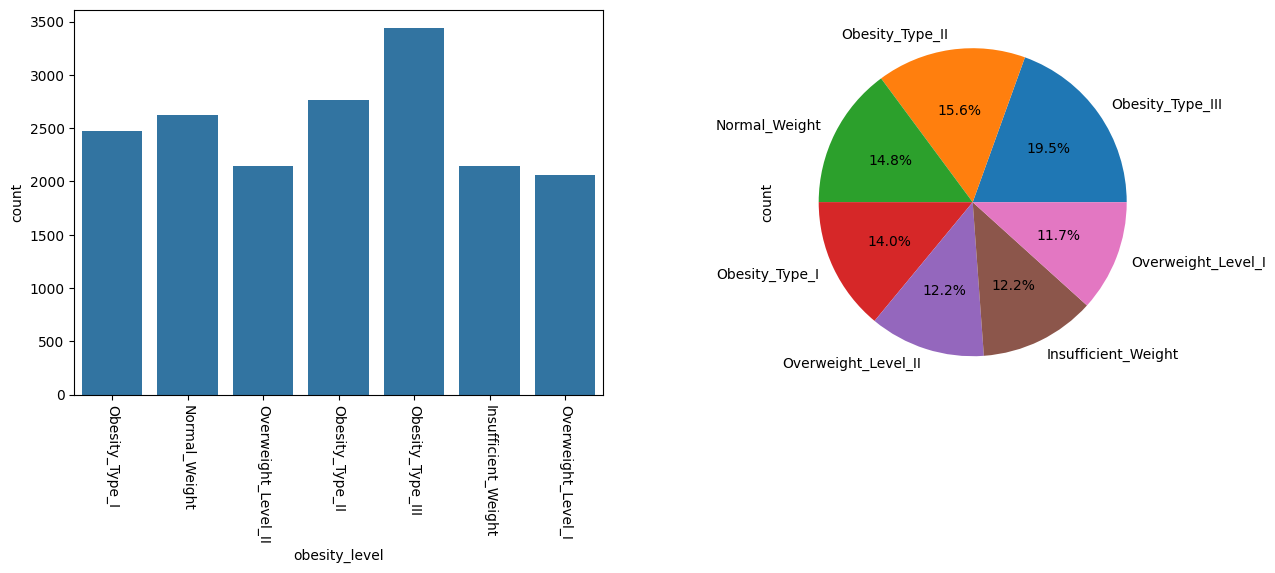

In [30]:
for col in train_categorical_visualization:
    print(f"================== {col} ===================")
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.xticks(rotation=270)
    sns.countplot(data=train_categorical_visualization, x=col)

    plt.subplot(1,2,2)
    train_categorical_visualization[col].value_counts().plot(kind='pie', autopct="%1.1f%%")
    
    plt.show()

### Bivariate - Numerical vs Numerical

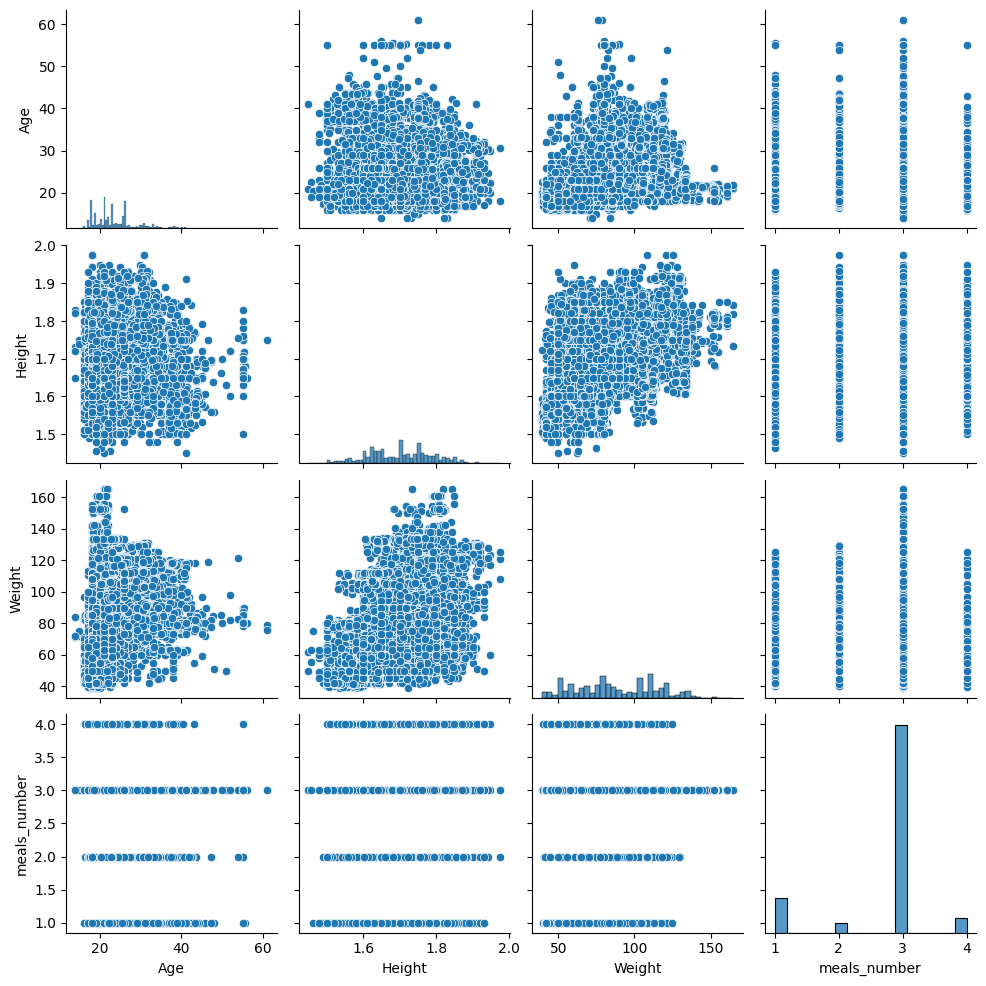

In [31]:
sns.pairplot(train_numeric_visualization);

### Bivariate - categorical vs categorical  

In [32]:
train_categorical_visualization

,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,Male,yes,yes,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Obesity_Type_I
1,Male,no,yes,medium,Sometimes,no,low,no,Light Activity,low,Sometimes,Public_Transportation,Normal_Weight
2,Male,no,no,medium,Sometimes,no,medium,no,Moderate Activity,medium,Sometimes,Automobile,Normal_Weight
3,Female,yes,yes,medium,Sometimes,no,high,no,Light Activity,low,no,Automobile,Overweight_Level_II
4,Male,yes,yes,high,Sometimes,no,medium,no,Sedentary,high,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,Female,yes,yes,medium,Sometimes,no,medium,no,Sedentary,low,no,Public_Transportation,Obesity_Type_I
17640,Female,yes,yes,high,Sometimes,no,high,no,Moderate Activity,high,Sometimes,Public_Transportation,Obesity_Type_III
17641,Male,yes,no,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Overweight_Level_I
17642,Female,yes,yes,high,Sometimes,no,high,no,Sedentary,low,Sometimes,Public_Transportation,Obesity_Type_III


### Each Column With Target Column [obesity_level]

================== Gender ===================


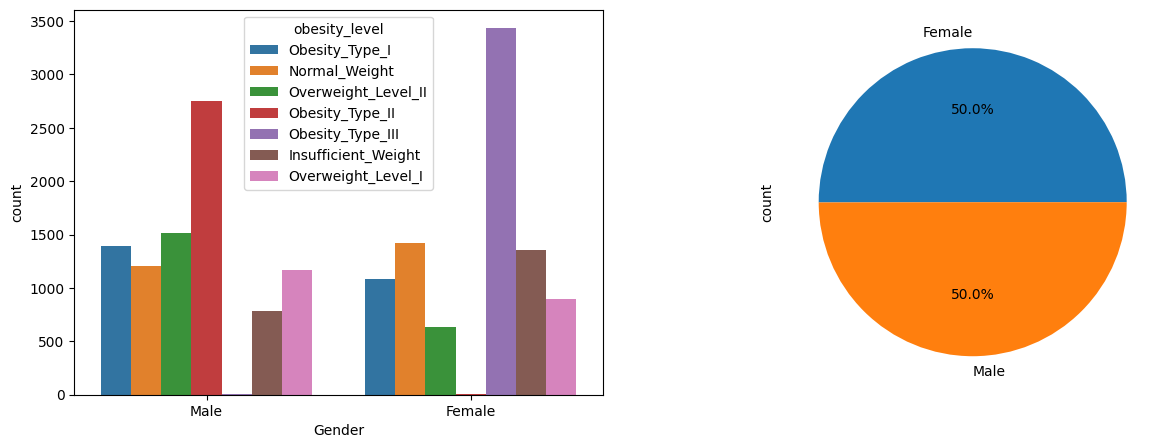

================== family_history_with_overweight ===================


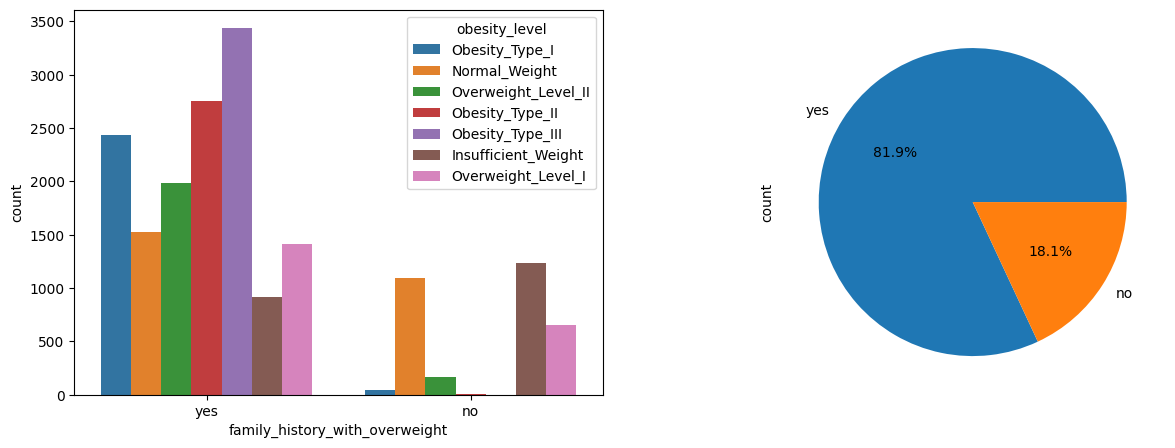

================== high_cal_consumption ===================


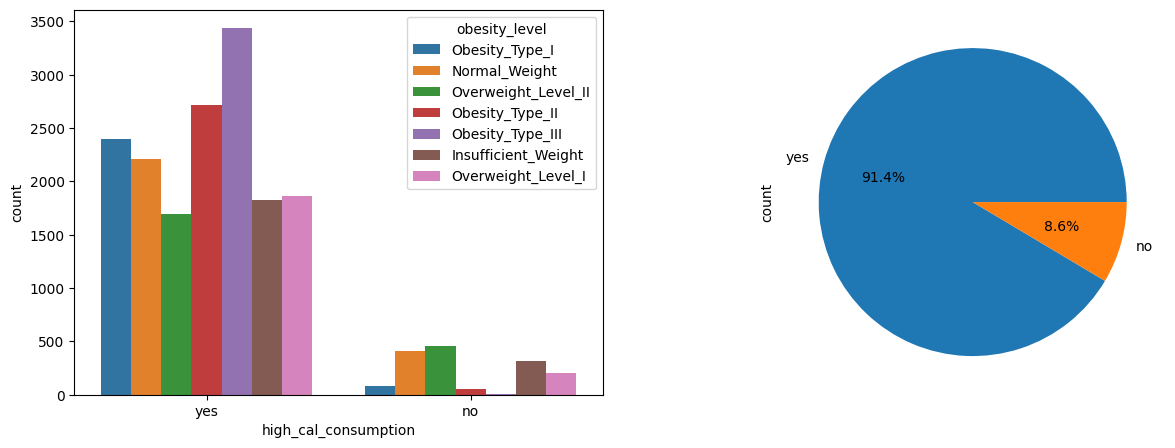

================== vegetable_consumption ===================


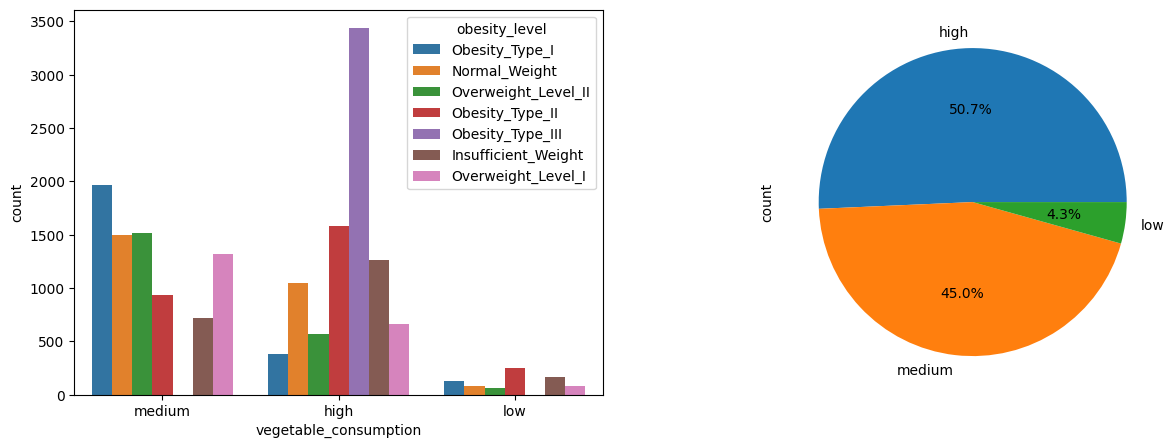

================== eating_between_meals ===================


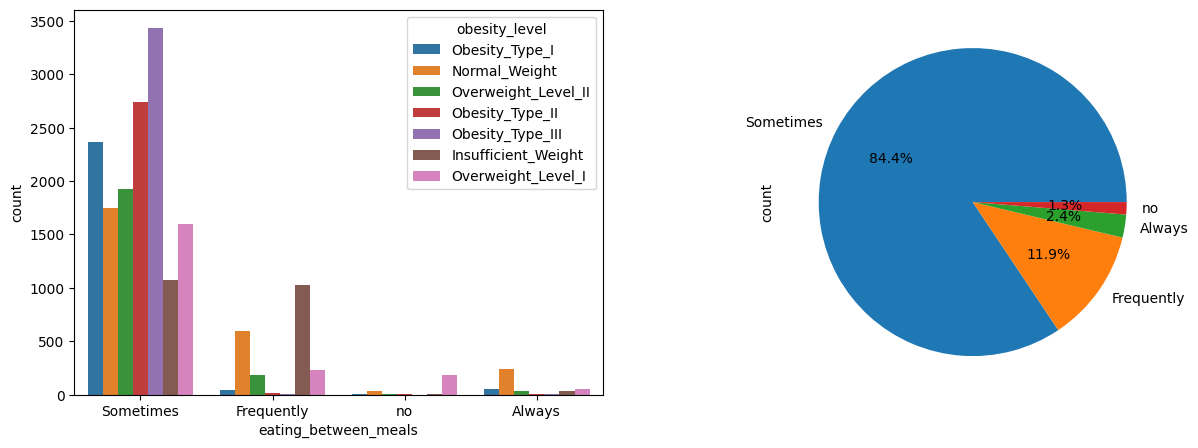

================== SMOKE ===================


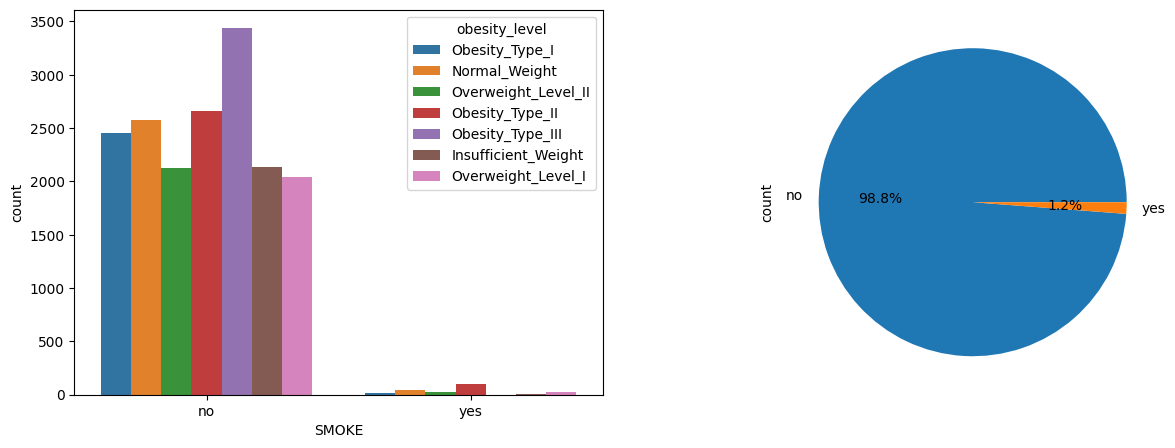

================== water_consumption ===================


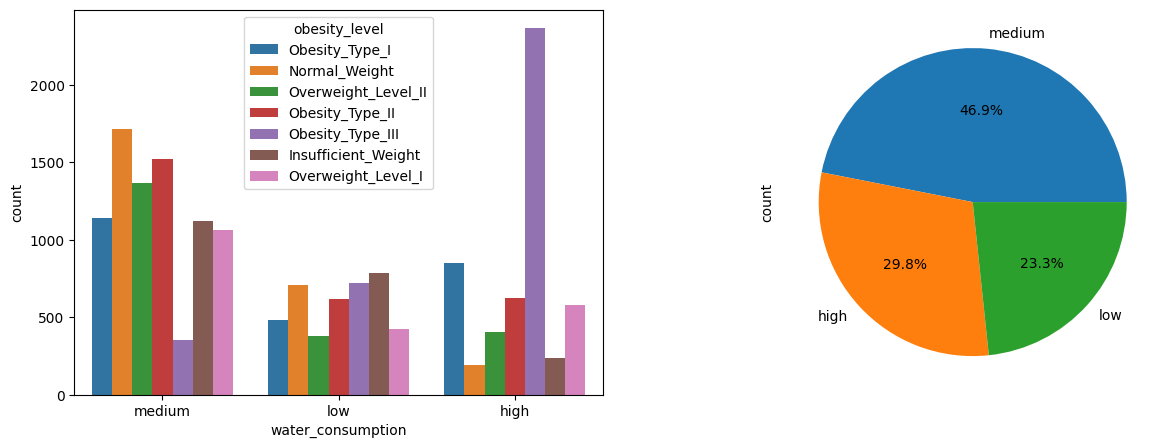

================== calorie_monitoring ===================


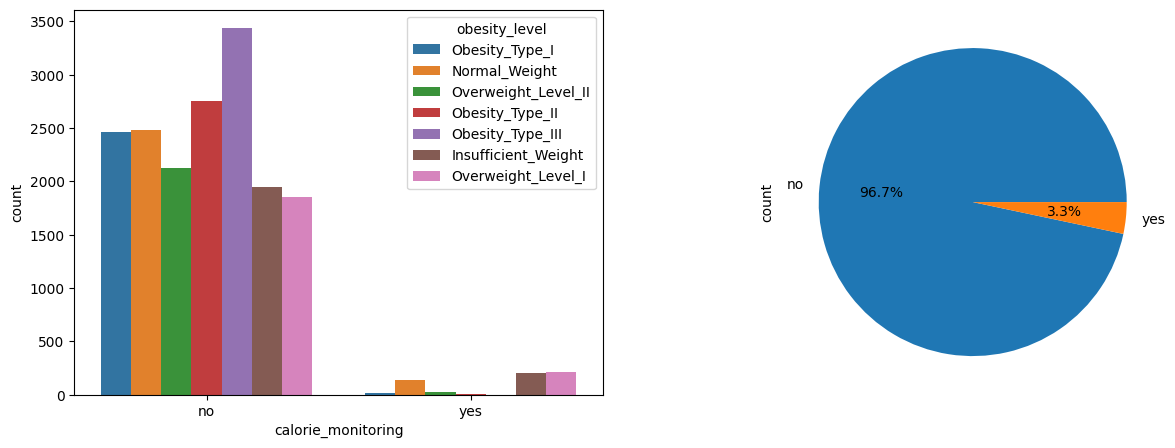

================== physical_activity ===================


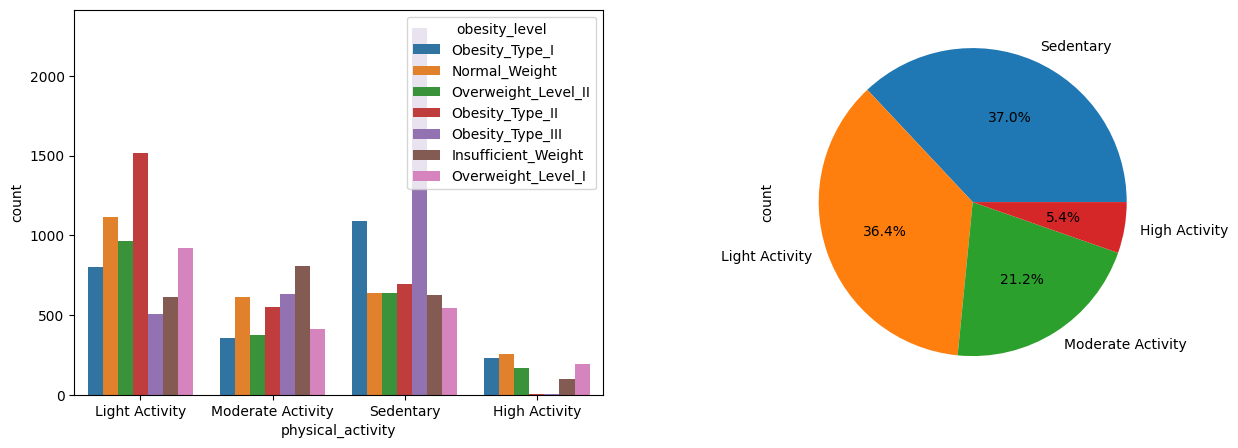

================== screen_time ===================


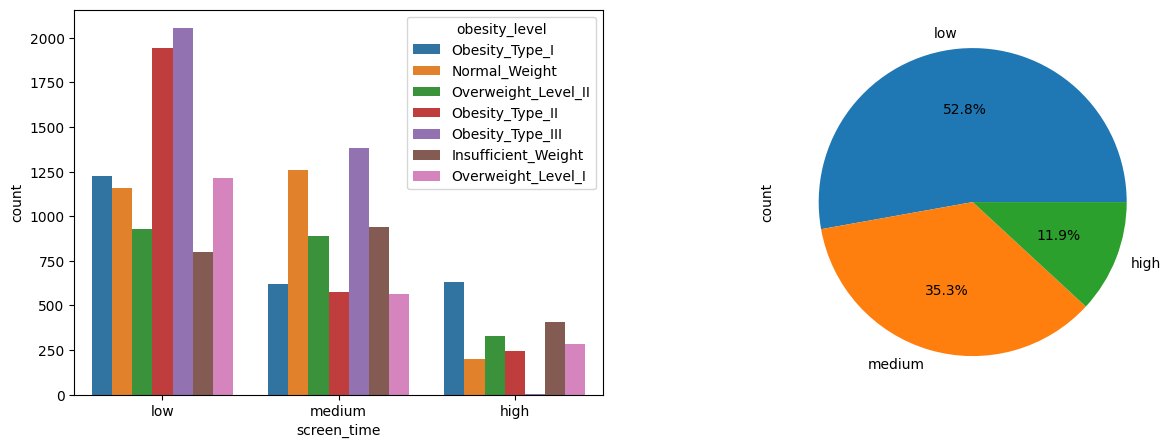

================== alcohole_consumption ===================


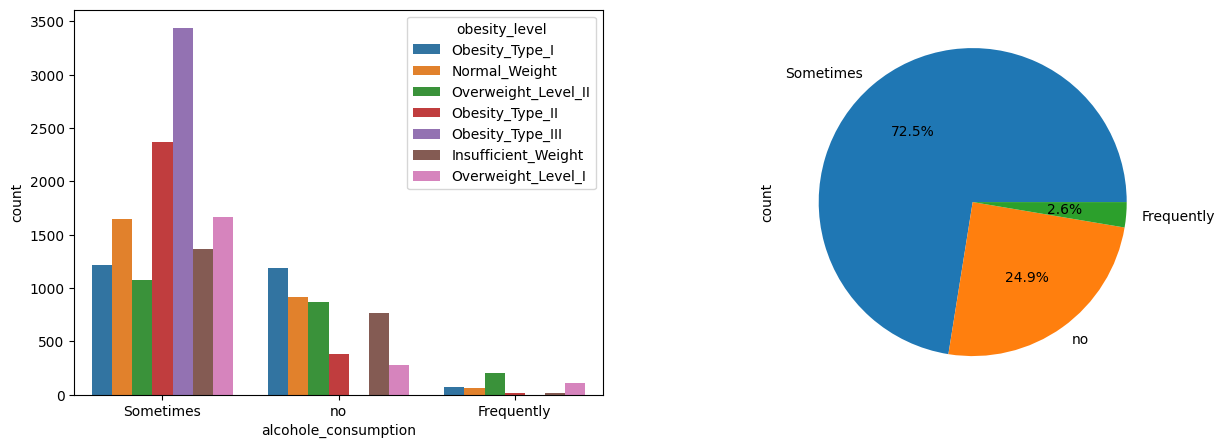

================== transportation_mode ===================


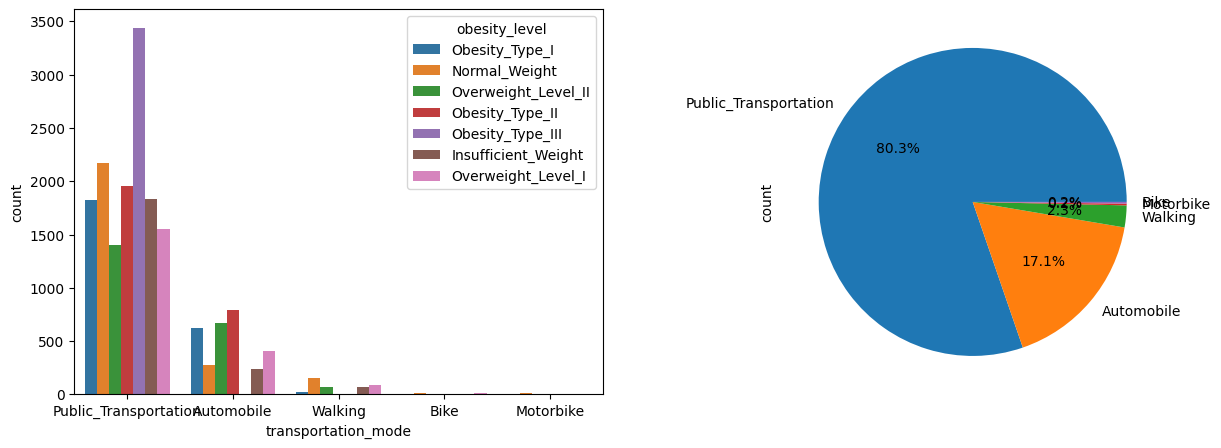

In [33]:
for col in train_categorical_visualization.columns[:-1]:
    print(f"================== {col} ===================")
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.countplot(data=train_categorical_visualization, x=col, hue='obesity_level')
    
    plt.subplot(1,2,2)
    train_categorical_visualization[col].value_counts().plot(kind='pie', autopct="%1.1f%%")

    plt.show()

### Gender Vs Features

================== family_history_with_overweight ===================


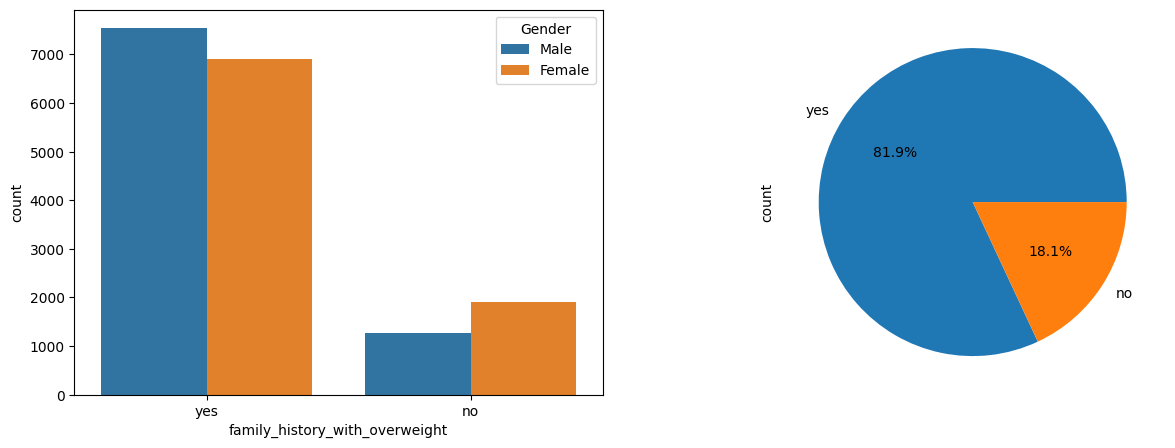

================== high_cal_consumption ===================


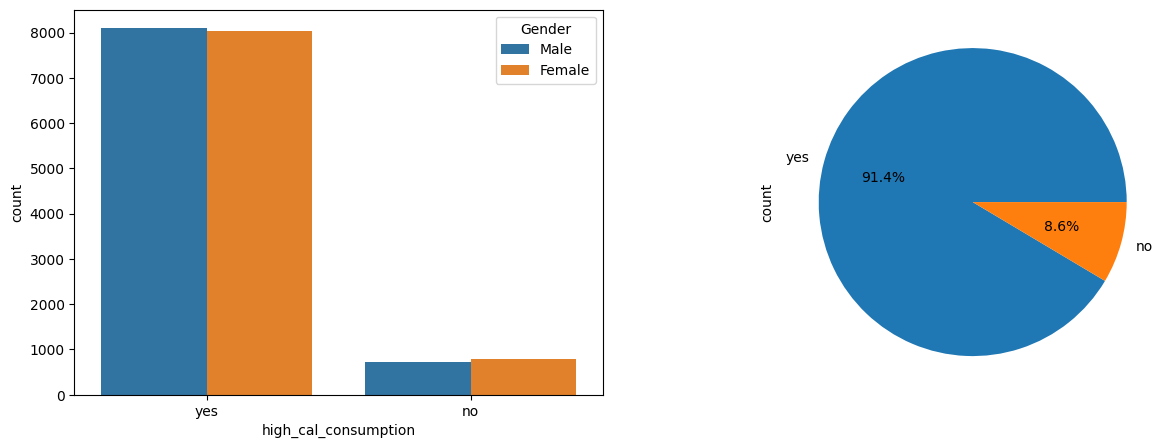

================== vegetable_consumption ===================


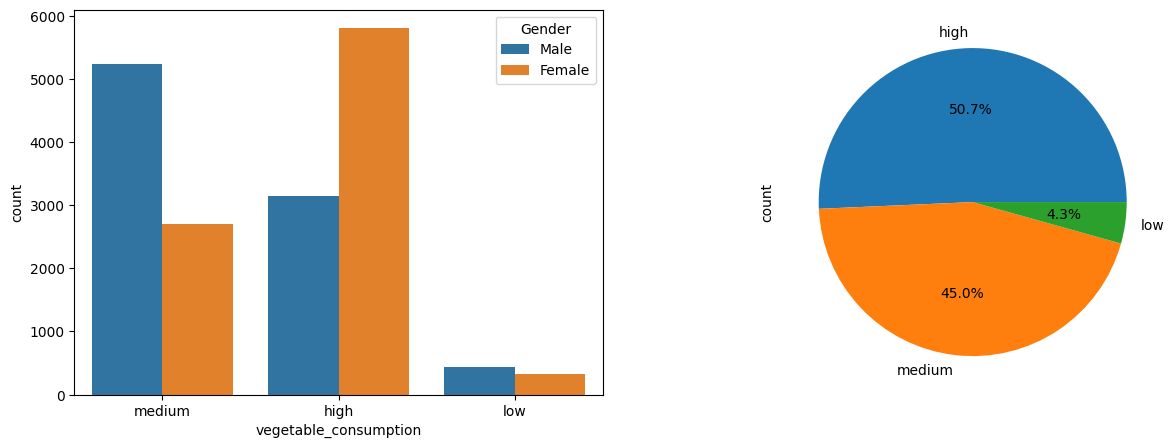

================== eating_between_meals ===================


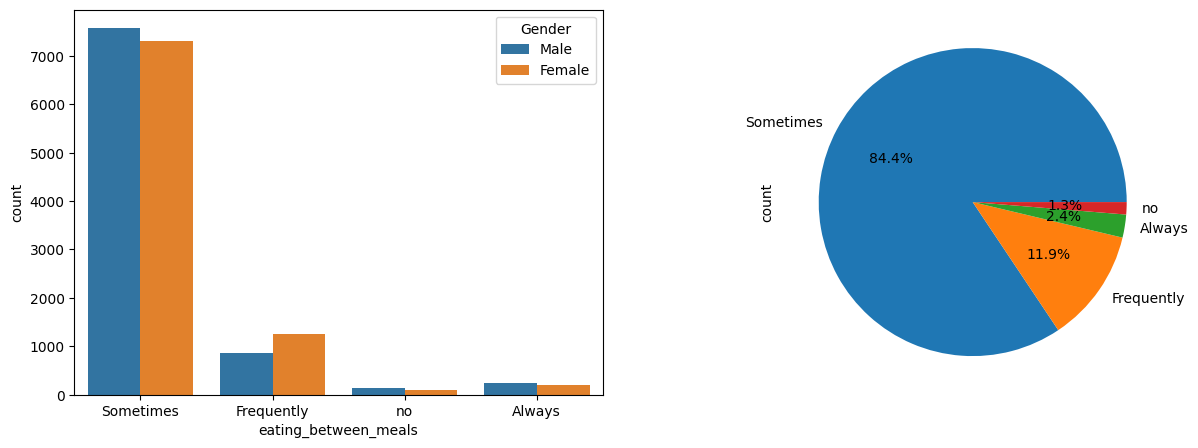

================== SMOKE ===================


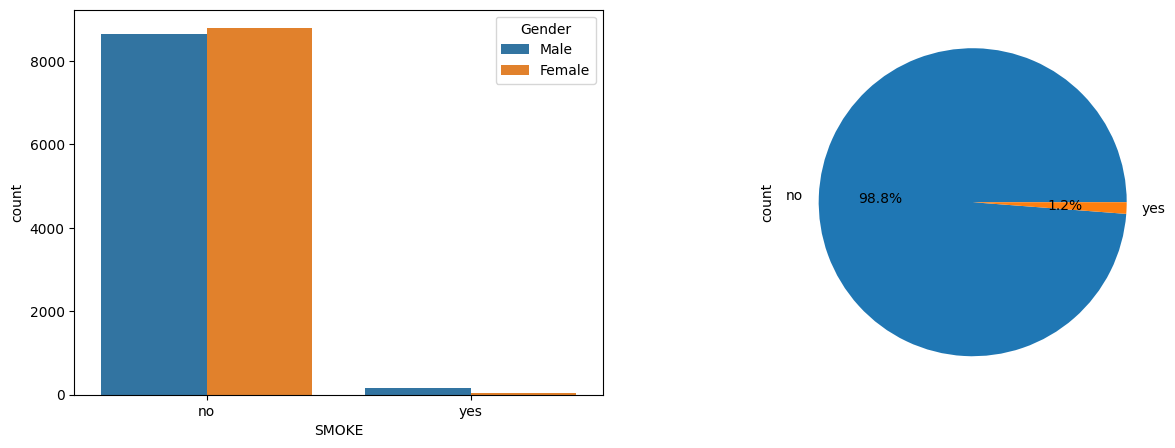

================== water_consumption ===================


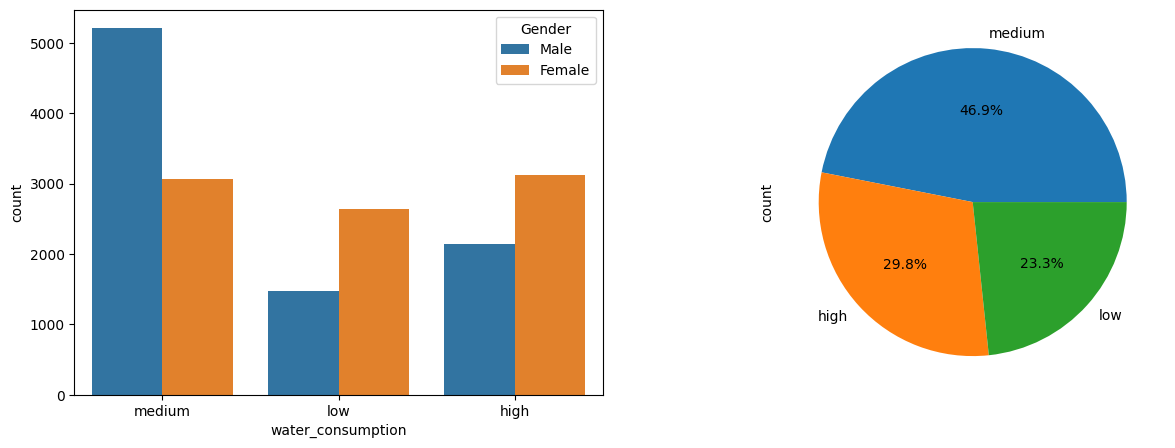

================== calorie_monitoring ===================


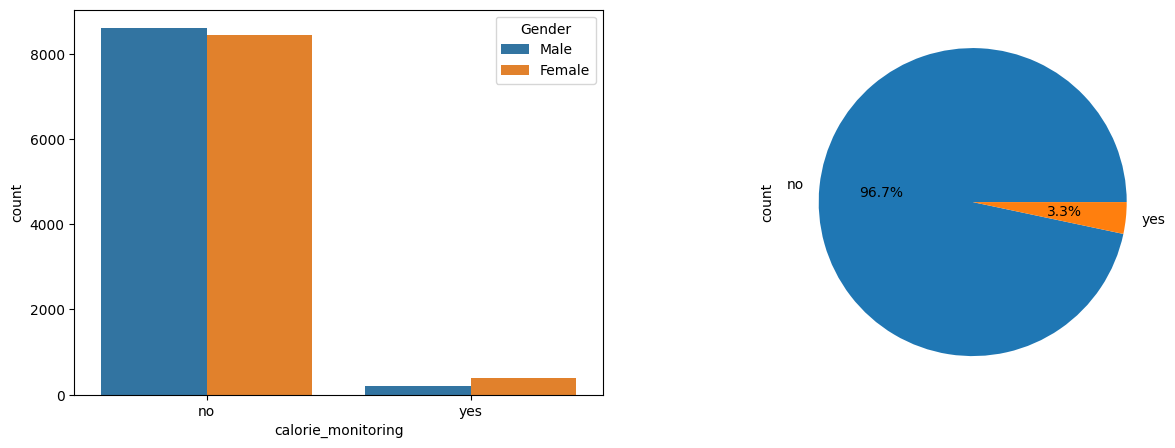

================== physical_activity ===================


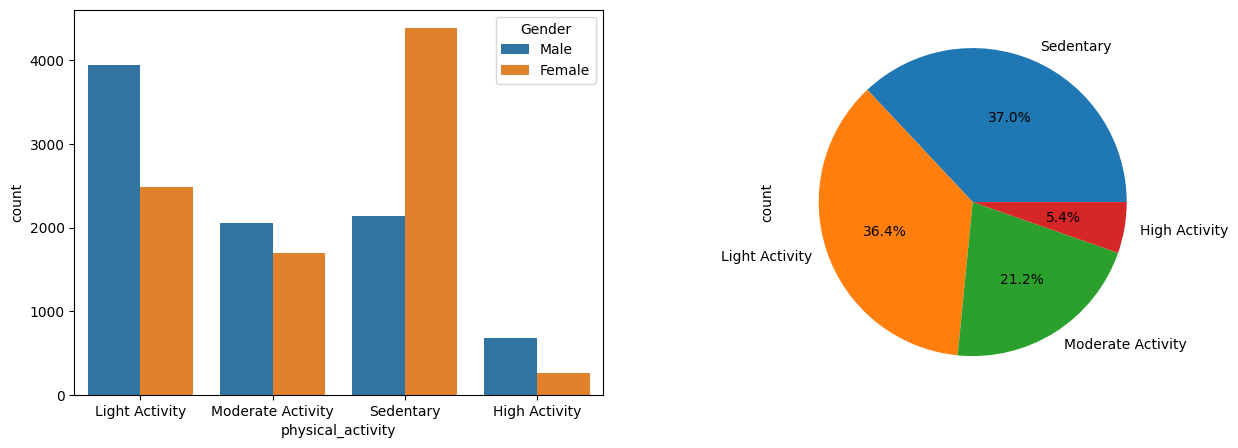

================== screen_time ===================


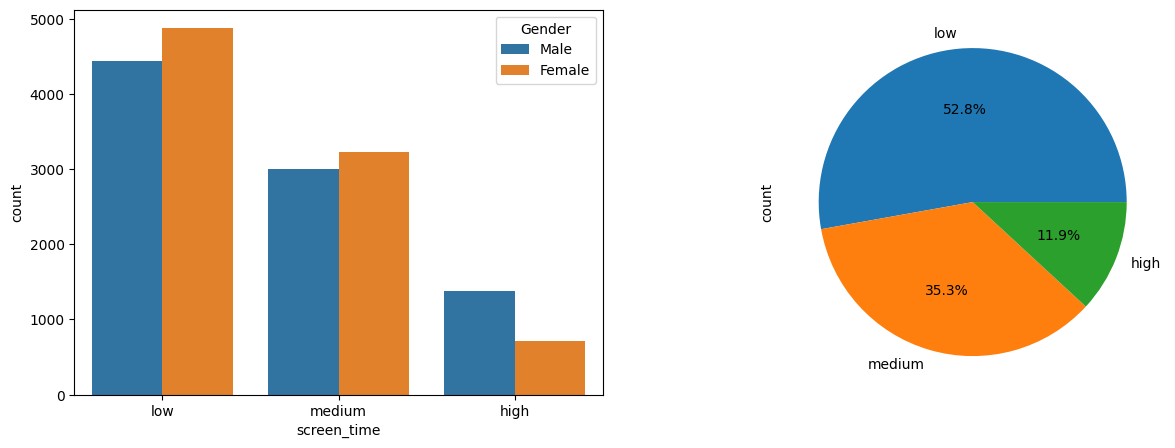

================== alcohole_consumption ===================


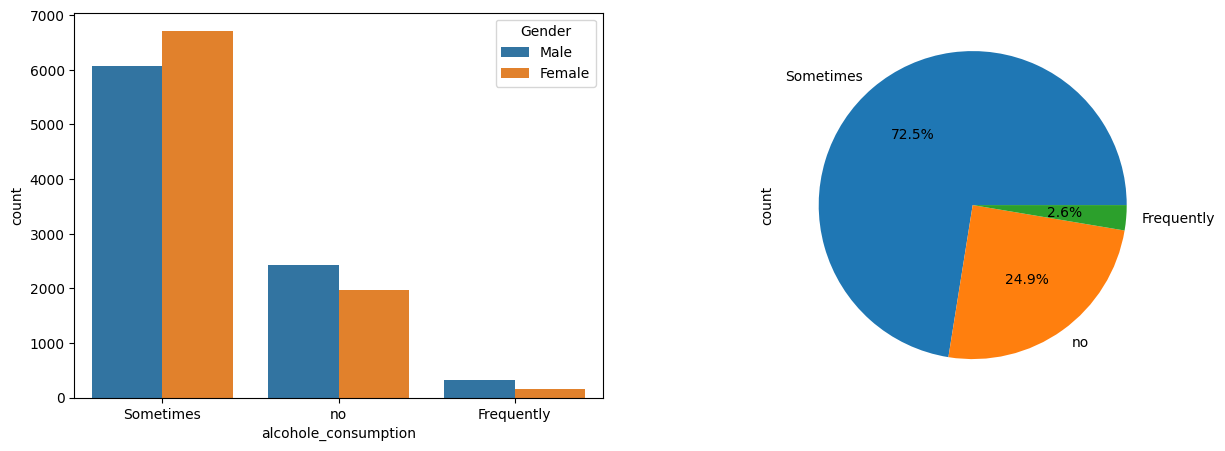

================== transportation_mode ===================


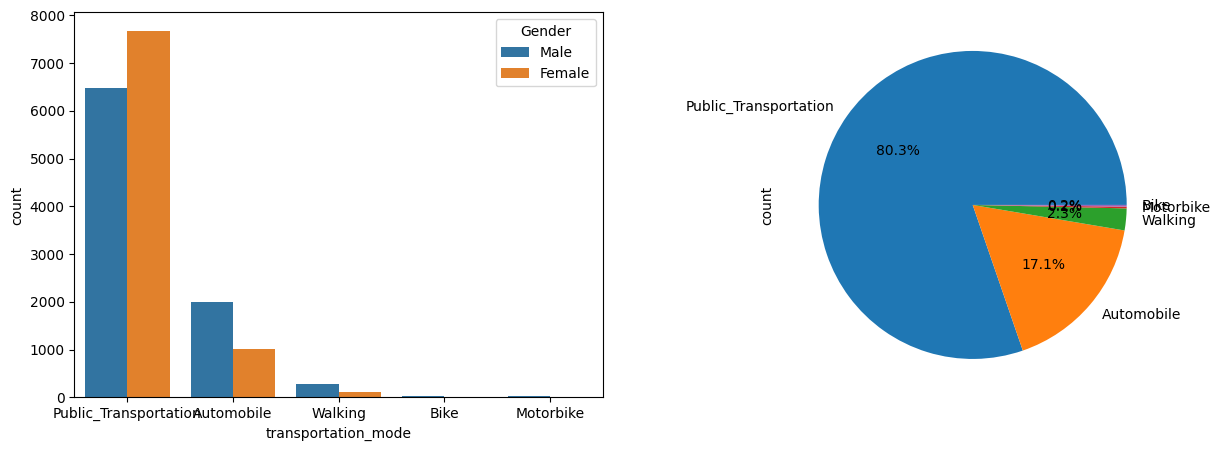

In [34]:
for col in train_categorical_visualization.drop(columns=['Gender', 'obesity_level']):
    print(f"================== {col} ===================")
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.countplot(data=train_categorical_visualization, x=col, hue='Gender')
    
    plt.subplot(1,2,2)
    train_categorical_visualization[col].value_counts().plot(kind='pie', autopct="%1.1f%%")

    plt.show()

### Multivariate - Heatmap

### Apply Ordinal Encoder To The Categorical Data To Make corr()


In [35]:
train_categorical_visualization

,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,Male,yes,yes,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Obesity_Type_I
1,Male,no,yes,medium,Sometimes,no,low,no,Light Activity,low,Sometimes,Public_Transportation,Normal_Weight
2,Male,no,no,medium,Sometimes,no,medium,no,Moderate Activity,medium,Sometimes,Automobile,Normal_Weight
3,Female,yes,yes,medium,Sometimes,no,high,no,Light Activity,low,no,Automobile,Overweight_Level_II
4,Male,yes,yes,high,Sometimes,no,medium,no,Sedentary,high,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,Female,yes,yes,medium,Sometimes,no,medium,no,Sedentary,low,no,Public_Transportation,Obesity_Type_I
17640,Female,yes,yes,high,Sometimes,no,high,no,Moderate Activity,high,Sometimes,Public_Transportation,Obesity_Type_III
17641,Male,yes,no,medium,Sometimes,no,medium,no,Light Activity,low,Sometimes,Public_Transportation,Overweight_Level_I
17642,Female,yes,yes,high,Sometimes,no,high,no,Sedentary,low,Sometimes,Public_Transportation,Obesity_Type_III


In [36]:
for col in train_categorical_visualization:
    print(f"===================== {col} ======================")
    print(train_categorical_visualization[col].value_counts())
    print()

===================== Gender ======================
Gender
Female    8826
Male      8818
Name: count, dtype: int64

===================== family_history_with_overweight ======================
family_history_with_overweight
yes    14459
no      3185
Name: count, dtype: int64

===================== high_cal_consumption ======================
high_cal_consumption
yes    16135
no      1509
Name: count, dtype: int64

===================== vegetable_consumption ======================
vegetable_consumption
high      8945
medium    7933
low        766
Name: count, dtype: int64

===================== eating_between_meals ======================
eating_between_meals
Sometimes     14887
Frequently     2103
Always          426
no              228
Name: count, dtype: int64

===================== SMOKE ======================
SMOKE
no     17431
yes      213
Name: count, dtype: int64

===================== water_consumption ======================
water_consumption
medium    8276
high      5252
low     

In [37]:
encoder = OrdinalEncoder(categories=[['Male', 'Female'], ['no', 'yes'], ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'yes'], ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently'], ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public_Transportation'], ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])                            
train_categorical_visualization_encoder = encoder.fit_transform(train_categorical_visualization)
train_categorical_visualization_encoder = pd.DataFrame(train_categorical_visualization_encoder, columns=train_categorical_visualization.columns)

In [38]:
train_categorical_visualization_encoder

,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,3.0
4,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0
17640,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,4.0,6.0
17641,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0
17642,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0


In [39]:
train_numeric_visualization

,Age,Height,Weight,meals_number
0,22.025438,1.701387,105.436173,2
1,21.000000,1.620000,70.000000,3
2,34.000000,1.740000,73.000000,3
3,34.288249,1.721348,80.420434,3
4,30.717727,1.673482,112.395309,3
...,...,...,...,...
17639,22.226815,1.609068,83.263120,1
17640,18.530840,1.823765,142.545183,3
17641,29.000000,1.760000,76.000000,3
17642,26.000000,1.623938,107.025415,3


In [40]:
train_visualization_encoder = pd.concat([train_numeric_visualization, train_categorical_visualization_encoder], axis=1)

In [41]:
train_numeric_visualization

,Age,Height,Weight,meals_number
0,22.025438,1.701387,105.436173,2
1,21.000000,1.620000,70.000000,3
2,34.000000,1.740000,73.000000,3
3,34.288249,1.721348,80.420434,3
4,30.717727,1.673482,112.395309,3
...,...,...,...,...
17639,22.226815,1.609068,83.263120,1
17640,18.530840,1.823765,142.545183,3
17641,29.000000,1.760000,76.000000,3
17642,26.000000,1.623938,107.025415,3


In [42]:
train_visualization_encoder

,Age,Height,Weight,meals_number,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,22.025438,1.701387,105.436173,2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0
1,21.000000,1.620000,70.000000,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0
2,34.000000,1.740000,73.000000,3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0
3,34.288249,1.721348,80.420434,3,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,3.0
4,30.717727,1.673482,112.395309,3,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,22.226815,1.609068,83.263120,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0
17640,18.530840,1.823765,142.545183,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,4.0,6.0
17641,29.000000,1.760000,76.000000,3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0
17642,26.000000,1.623938,107.025415,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0


In [43]:
train_visualization_encoder.corr()

,Age,Height,Weight,meals_number,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
Age,1.000000,-0.010604,0.284529,-0.051347,-0.064062,0.258618,0.053887,0.041965,-0.150150,0.053764,-0.011817,-0.110371,-0.191376,-0.285191,0.073257,-0.258216,0.356023
Height,-0.010604,1.000000,0.415107,0.186949,-0.622336,0.226439,0.112454,-0.047897,-0.070186,0.072258,0.153614,-0.096106,0.271147,0.094089,0.089559,-0.068018,0.148029
Weight,0.284529,0.415107,1.000000,0.088215,-0.116052,0.513412,0.227025,0.232666,-0.338885,0.039408,0.321033,-0.185059,-0.094061,-0.117848,0.216758,0.097617,0.920773
meals_number,-0.051347,0.186949,0.088215,1.000000,-0.038972,0.033977,0.015631,0.099704,0.086600,0.006573,0.085184,0.005284,0.091597,0.033862,0.100521,-0.041410,0.018420
Gender,-0.064062,-0.622336,-0.116052,-0.038972,1.000000,-0.093949,-0.015872,0.271755,0.043553,-0.066998,-0.015033,0.058478,-0.219808,-0.089878,0.035759,0.143305,0.071771
family_history_with_overweight,0.258618,0.226439,0.513412,0.033977,-0.093949,1.000000,0.151544,0.046411,-0.207659,0.019497,0.189640,-0.168228,-0.093787,-0.011116,-0.003207,0.028182,0.522283
high_cal_consumption,0.053887,0.112454,0.227025,0.015631,-0.015872,0.151544,1.000000,0.008225,-0.112749,-0.016299,0.049745,-0.108627,-0.069556,0.017883,0.080358,0.102887,0.214160
vegetable_consumption,0.041965,-0.047897,0.232666,0.099704,0.271755,0.046411,0.008225,1.000000,0.001055,-0.014997,0.117207,0.021215,-0.067139,-0.169598,0.108528,0.052697,0.252393
eating_between_meals,-0.150150,-0.070186,-0.338885,0.086600,0.043553,-0.207659,-0.112749,0.001055,1.000000,0.020733,-0.126751,0.093440,0.097102,0.054941,-0.070249,-0.036565,-0.365048
SMOKE,0.053764,0.072258,0.039408,0.006573,-0.066998,0.019497,-0.016299,-0.014997,0.020733,1.000000,-0.034117,0.011414,0.013883,-0.014829,0.021158,-0.018724,0.010500


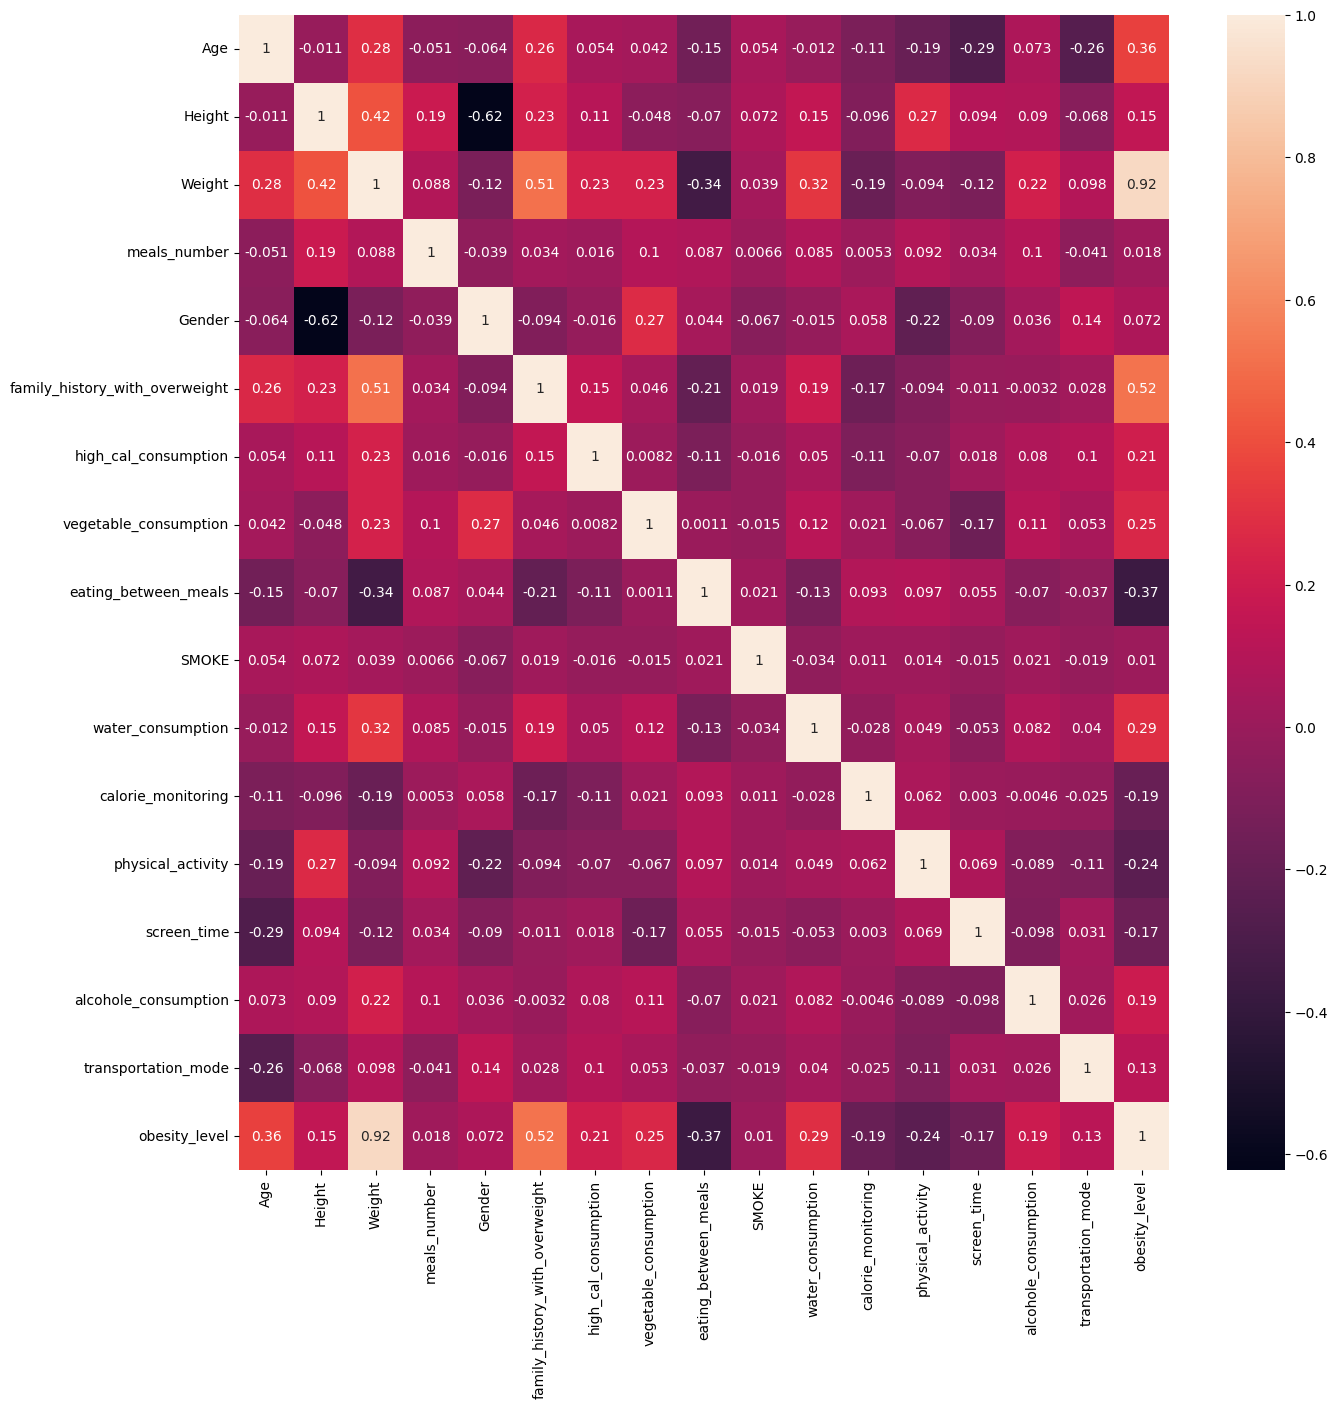

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=train_visualization_encoder.corr(), annot=True);

# `04` Data Preparation

### Data Preprocess Function

In [45]:
# funciton that make equal-width-binning on the scaling columns
def equal_width_binning(data:pd.DataFrame, col_name:str, bins:int, labels:list, object:int):
    data = data.copy()
        
    # convert the column from categorical to object datatype
    if object == 1:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('object')
        return data[col_name]
    
    # convert the column from categorical to integer datatype
    elif object == 0:
        data[col_name] = pd.cut(data[col_name], bins=bins, labels=labels)
        data[col_name] = data[col_name].astype('int32')
        return data[col_name]    

In [46]:
def preprocess_data(data:pd.DataFrame):
    # Reset The index
    data = data.reset_index()
    data.drop(columns=['index'], inplace=True)

    # Rename the columns
    data_preprocess = data.copy()

    data_preprocess.rename(columns={'FAVC':"high_cal_consumption", 'FCVC':"vegetable_consumption", "NCP":"meals_number", 
                                'CAEC':"eating_between_meals", "CH2O":"water_consumption", "SCC":"calorie_monitoring", 
                                "FAF":"physical_activity", "TUE":"screen_time", "CALC":"alcohole_consumption",
                                "MTRANS":"transportation_mode", "NObeyesdad":"obesity_level"
                                }, inplace=True)

    # Drop id Column
    data_preprocess.drop(columns=['id'], inplace=True)

    # Numeric Columns ['Age', 'Height', 'Weight']
    # Age Column -> Round to the nearest integer and then convert the datatype to int32 
    data_preprocess['Age'] = data_preprocess['Age'].round().astype('int32')

    # Height Column -> Round to the nearest 2 floating points 
    data_preprocess['Height'] = data_preprocess['Height'].round(2)

    # Weight Column -> Round to the nearest 2 floating points
    data_preprocess['Weight'] = data_preprocess['Weight'].round(2)

    # Scaling Columns [vegetable_consumption, meals_number, water_consumption, physical_activity, screen_time]
    # make equal width binning
    # Apply Function on [vegetable_consumption, screen_time, water_consumption]
    target_columns = ['vegetable_consumption', 'screen_time', 'water_consumption']
    for col in target_columns:
        data_preprocess[col] = equal_width_binning(data_preprocess, col, 3, ['low', 'medium', 'high'], object=1)

    # Apply Function on physical_activity
    data_preprocess['physical_activity'] = equal_width_binning(data_preprocess, 'physical_activity', 4, ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], object=1)

    # Apply Function on meals_number
    data_preprocess['meals_number'] = equal_width_binning(data_preprocess, 'meals_number', 4, [1, 2, 3, 4], object=0)

    # Categorical Columns -> encode them using ordinal encoder
    # [family_history_with_overweight, high_cal_consumption, vegetable_consumption, meals_number, eating_between_meals, SMOKE,
    #  water_consumption, calorie_monitoring, physical_activity, screen_time, alcohole_consumption, transportation_mode, obesity_level]
    preprocess_encoder = OrdinalEncoder(categories=[['Male', 'Female'], ['no', 'yes'], ['no', 'yes'], 
                                                    ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently', 'Always'], 
                                                    ['no', 'yes'], ['low', 'medium', 'high'], ['no', 'yes'], 
                                                    ['Sedentary', 'Light Activity', 'Moderate Activity', 'High Activity'], 
                                                    ['low', 'medium', 'high'], ['no', 'Sometimes', 'Frequently'], 
                                                    ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public_Transportation'], 
    ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])                            

    # categorical columns
    data_categorical_preprocess = data_preprocess.select_dtypes(include='object')

    # numerical columns
    data_numerical_preprocess = data_preprocess.select_dtypes(exclude='object')

    # encode the categorical columns
    data_encoder_preprocess = preprocess_encoder.fit_transform(data_categorical_preprocess)

    data_encoder_preprocess = pd.DataFrame(data_encoder_preprocess, columns=data_categorical_preprocess.columns)

    final_data = pd.concat([data_numerical_preprocess, data_encoder_preprocess], axis=1)

    return final_data




### Train - Preprocessing

In [47]:
train_preprocess = preprocess_data(train)
train_preprocess

,Age,Height,Weight,meals_number,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,22,1.70,105.44,2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0
1,21,1.62,70.00,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0
2,34,1.74,73.00,3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0
3,34,1.72,80.42,3,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,3.0
4,31,1.67,112.40,3,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,22,1.61,83.26,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0
17640,19,1.82,142.55,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,4.0,6.0
17641,29,1.76,76.00,3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0
17642,26,1.62,107.03,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0


### Train - Split - Scaling

In [48]:
x_train = train_preprocess.iloc[:,:-1]
y_train = train_preprocess.iloc[:,-1]

In [49]:
train_scaler = StandardScaler()
x_train_scaled = train_scaler.fit_transform(x_train)

### Val - Preprocessing

In [50]:
val_preprocess =  preprocess_data(valid)
val_preprocess

,Age,Height,Weight,meals_number,Gender,family_history_with_overweight,high_cal_consumption,vegetable_consumption,eating_between_meals,SMOKE,water_consumption,calorie_monitoring,physical_activity,screen_time,alcohole_consumption,transportation_mode,obesity_level
0,22,1.75,133.67,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,6.0
1,20,1.88,66.00,3,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,1.0
2,33,1.70,83.00,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0
3,26,1.64,111.94,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0
4,26,1.62,108.11,3,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,21,1.67,126.80,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,6.0
3110,22,1.74,75.00,3,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0
3111,24,1.75,117.38,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,4.0,5.0
3112,22,1.73,133.04,3,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,6.0


### Validate - Split - Scaling

In [51]:
x_val = val_preprocess.iloc[:, :-1]
y_val = val_preprocess.iloc[:, -1]

In [52]:
x_val_scaled = train_scaler.transform(x_val)

# `05` Model Building
- Naive Bayes
- KNN
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- XGB

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=89)

### SVM

In [56]:
from sklearn.svm import SVC
svm = SVC(random_state=89)

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=89)

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=89)

### XGB

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_forest=89)

# `06` Model Training

### Naive Bayes

In [60]:
naive_bayes.fit(x_train_scaled, y_train)

GaussianNB()

### KNN

In [61]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

### Logistic Regression

In [62]:
logistic_regression.fit(x_train_scaled, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=89)

### SVM

In [63]:
svm.fit(x_train_scaled, y_train)

SVC(random_state=89)

### Decision Tree

In [64]:
decision_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=89)

### Random Forest

In [65]:
random_forest.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=89)

### XGB

In [66]:
xgb.fit(x_train_scaled, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [05:41:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_forest" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# `07` Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Naive Bayes

In [68]:
y_val_hat = naive_bayes.predict(x_val_scaled)
y_val_hat

array([6., 1., 4., ..., 5., 6., 4.])

In [69]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.655
precision_score = 0.655
recall_score = 0.655
classification_report =               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78       379
         1.0       0.63      0.40      0.49       462
         2.0       0.62      0.29      0.39       364
         3.0       0.55      0.24      0.33       378
         4.0       0.37      0.61      0.46       437
         5.0       0.71      0.93      0.81       487
         6.0       0.93      0.99      0.96       607

    accuracy                           0.66      3114
   macro avg       0.64      0.62      0.60      3114
weighted avg       0.66      0.66      0.63      3114

confusion_matrix = [[340  31   0   0   6   0   2]
 [140 187  28  23  60   0  24]
 [  9  47 104  25 159  13   7]
 [  2  24  23  90 193  41   5]
 [  1   3  13  19 265 129   7]
 [  0   0   0   6  29 452   0]
 [  0   3   1   1   0   0 602]]


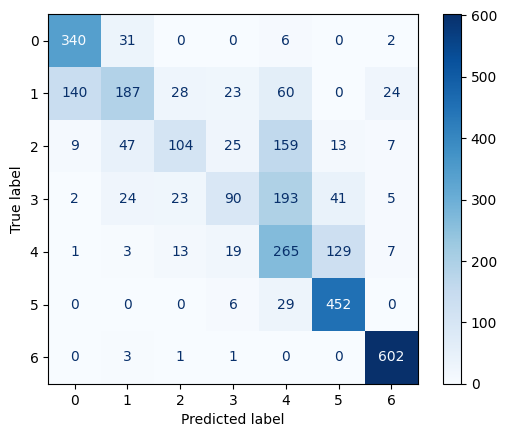

In [70]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### KNN

In [71]:
y_val_hat = knn.predict(x_val_scaled)
y_val_hat

array([6., 1., 3., ..., 5., 6., 4.])

In [72]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.737
precision_score = 0.737
recall_score = 0.737
classification_report =               precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       379
         1.0       0.55      0.63      0.59       462
         2.0       0.52      0.46      0.49       364
         3.0       0.58      0.59      0.58       378
         4.0       0.73      0.64      0.68       437
         5.0       0.90      0.91      0.91       487
         6.0       1.00      0.99      0.99       607

    accuracy                           0.74      3114
   macro avg       0.71      0.71      0.71      3114
weighted avg       0.74      0.74      0.74      3114

confusion_matrix = [[285  81  10   2   1   0   0]
 [ 76 292  55  27  12   0   0]
 [ 20  83 168  59  32   2   0]
 [  3  55  44 223  38  15   0]
 [  3  18  46  54 281  32   3]
 [  0   0   2  21  20 444   0]
 [  0   3   0   1   0   1 602]]


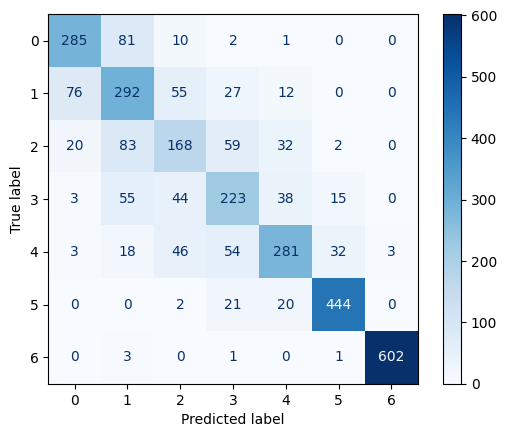

In [73]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### Logistic Regression

In [74]:
y_val_hat = logistic_regression.predict(x_val_scaled)
y_val_hat

array([6., 1., 3., ..., 5., 6., 4.])

In [75]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.86
precision_score = 0.86
recall_score = 0.86
classification_report =               precision    recall  f1-score   support

         0.0       0.86      0.96      0.90       379
         1.0       0.85      0.82      0.83       462
         2.0       0.73      0.69      0.71       364
         3.0       0.74      0.66      0.70       378
         4.0       0.80      0.84      0.82       437
         5.0       0.94      0.95      0.94       487
         6.0       0.99      1.00      1.00       607

    accuracy                           0.86      3114
   macro avg       0.84      0.84      0.84      3114
weighted avg       0.86      0.86      0.86      3114

confusion_matrix = [[362  16   1   0   0   0   0]
 [ 57 378  22   5   0   0   0]
 [  2  45 252  52  13   0   0]
 [  0   6  60 250  58   4   0]
 [  1   1   9  28 368  26   4]
 [  0   0   0   3  22 462   0]
 [  0   0   2   0   0   0 605]]


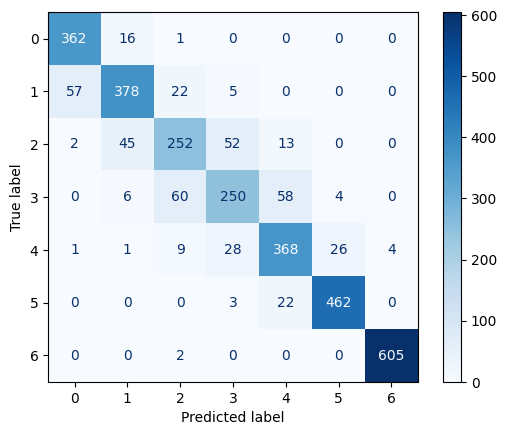

In [76]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### SVM

In [77]:
y_val_hat = svm.predict(x_val_scaled)
y_val_hat

array([6., 1., 3., ..., 5., 6., 4.])

In [78]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.865
precision_score = 0.865
recall_score = 0.865
classification_report =               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       379
         1.0       0.81      0.84      0.82       462
         2.0       0.70      0.66      0.68       364
         3.0       0.73      0.74      0.74       378
         4.0       0.87      0.83      0.85       437
         5.0       0.95      0.97      0.96       487
         6.0       1.00      0.99      0.99       607

    accuracy                           0.86      3114
   macro avg       0.85      0.85      0.85      3114
weighted avg       0.86      0.86      0.86      3114

confusion_matrix = [[348  31   0   0   0   0   0]
 [ 36 386  34   6   0   0   0]
 [  3  48 242  58  13   0   0]
 [  0   7  56 280  31   4   0]
 [  1   4  12  33 364  20   3]
 [  0   0   0   5  11 471   0]
 [  0   0   2   0   0   3 602]]


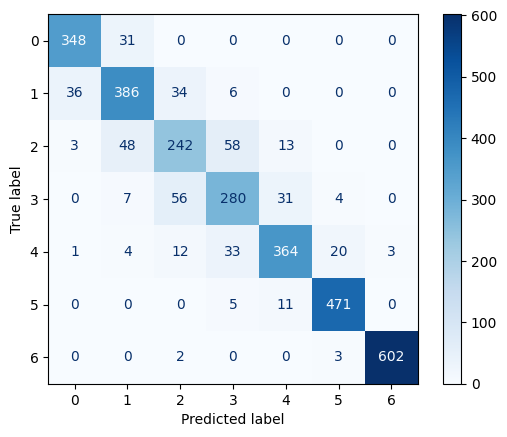

In [79]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### Decision Tree

In [80]:
y_val_hat = decision_tree.predict(x_val_scaled)
y_val_hat

array([6., 1., 3., ..., 5., 6., 4.])

In [81]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.843
precision_score = 0.843
recall_score = 0.843
classification_report =               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       379
         1.0       0.78      0.81      0.80       462
         2.0       0.69      0.67      0.68       364
         3.0       0.73      0.72      0.73       378
         4.0       0.80      0.79      0.79       437
         5.0       0.93      0.93      0.93       487
         6.0       0.99      0.99      0.99       607

    accuracy                           0.84      3114
   macro avg       0.83      0.83      0.83      3114
weighted avg       0.84      0.84      0.84      3114

confusion_matrix = [[331  43   4   1   0   0   0]
 [ 42 374  40   6   0   0   0]
 [  2  49 244  49  18   0   2]
 [  2   7  47 272  44   5   1]
 [  1   4  19  38 346  27   2]
 [  0   0   0   5  24 455   3]
 [  0   1   0   0   3   0 603]]


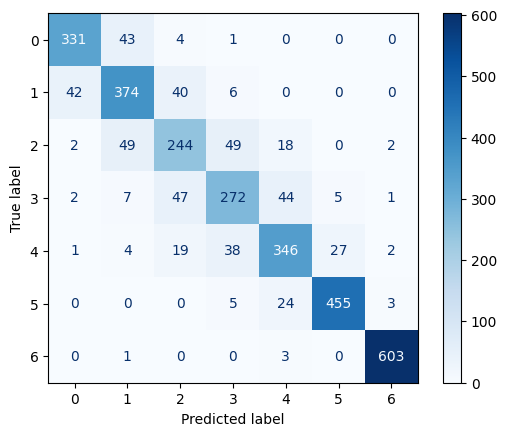

In [82]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### Random Forest

In [83]:
y_val_hat = random_forest.predict(x_val_scaled)
y_val_hat

array([6., 1., 3., ..., 5., 6., 4.])

In [84]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.898
precision_score = 0.898
recall_score = 0.898
classification_report =               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       379
         1.0       0.86      0.89      0.88       462
         2.0       0.79      0.75      0.77       364
         3.0       0.80      0.80      0.80       378
         4.0       0.88      0.87      0.87       437
         5.0       0.96      0.96      0.96       487
         6.0       1.00      1.00      1.00       607

    accuracy                           0.90      3114
   macro avg       0.89      0.89      0.89      3114
weighted avg       0.90      0.90      0.90      3114

confusion_matrix = [[358  21   0   0   0   0   0]
 [ 27 411  21   3   0   0   0]
 [  1  35 274  43  11   0   0]
 [  0   8  36 301  28   5   0]
 [  1   1  15  25 380  13   2]
 [  0   0   0   4  14 469   0]
 [  0   0   2   0   1   0 604]]


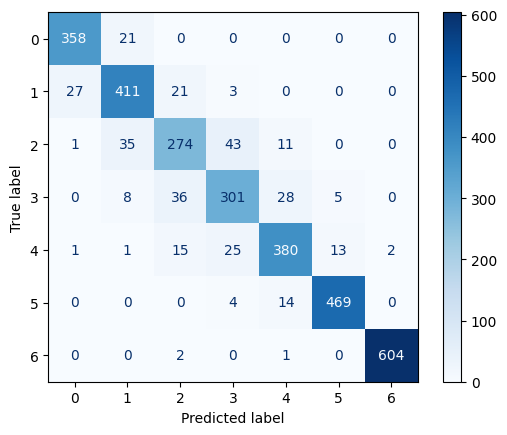

In [85]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');

### XGB

In [86]:
y_val_hat = xgb.predict(x_val_scaled)
y_val_hat

array([6, 1, 3, ..., 5, 6, 4], dtype=int64)

In [87]:
print("Accuracy =", round(accuracy_score(y_val, y_val_hat), 3))

print("precision_score =", round(precision_score(y_val, y_val_hat, average='micro'), 3))

print("recall_score =", round(recall_score(y_val, y_val_hat, average='micro'), 3))

print("classification_report =", classification_report(y_val, y_val_hat))

print("confusion_matrix =",confusion_matrix(y_val, y_val_hat))

Accuracy = 0.907
precision_score = 0.907
recall_score = 0.907
classification_report =               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       379
         1.0       0.88      0.89      0.88       462
         2.0       0.81      0.79      0.80       364
         3.0       0.83      0.80      0.82       378
         4.0       0.88      0.88      0.88       437
         5.0       0.96      0.96      0.96       487
         6.0       1.00      1.00      1.00       607

    accuracy                           0.91      3114
   macro avg       0.90      0.90      0.90      3114
weighted avg       0.91      0.91      0.91      3114

confusion_matrix = [[358  21   0   0   0   0   0]
 [ 25 413  22   2   0   0   0]
 [  1  33 289  32   9   0   0]
 [  0   5  35 304  28   6   0]
 [  1   0  11  25 385  13   2]
 [  0   0   0   2  16 469   0]
 [  0   0   2   0   0   0 605]]


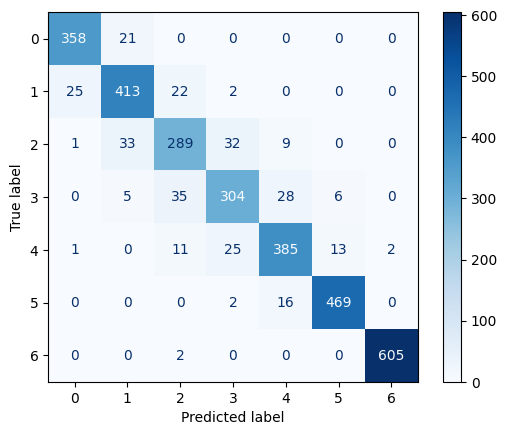

In [88]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_hat))
cm.plot(cmap='Blues');